In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
import scipy.stats as stats
import missingno as msno


# Optional: used to avoid blurry output plots in Jupyter Notebooks
%config InlineBackend.figure_format = 'retina' 

## **A. An overview of the dataset**

#### **1. Import the data as a pandas DataFrame into your notebook**

In [2]:
my_folder = "/Users/Andy/Desktop/Documents/GitHub/project-adsml-ibex-c2-s10-5121-3258"
file_loc = my_folder+"/data_385k.pkl"

In [3]:
df_openfood = pd.read_pickle('data_385k.pkl', compression='zip')

#### **2. Check the number of rows and columns. You should have 385’384 samples and 99 columns**

In [4]:
df_openfood.shape

(385384, 99)

#### **3. Display a few entries from the DataFrame**

In [5]:
df_openfood.head(5)

,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,...,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit
0,0.0,8001772000030,NaN,NaN,75.00,37.50,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,7610809001066,NaN,NaN,1.50,1.13,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,8002530159021,NaN,NaN,52.68,NaN,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,3033715065788,NaN,NaN,70.40,11.97,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,7610848492740,NaN,NaN,37.00,7.40,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### **4. Check the data type for each column. Create separate lists to hold the names of columns of the same data type**

In [6]:
# Check data type for each column

pd.set_option('display.max_rows', 100)
df_openfood.dtypes

alcohol_by_volume                                  float64
barcode                                             object
calcium_per_hundred                                float64
calcium_unit                                        object
carbohydrates_per_hundred                          float64
carbohydrates_per_portion                          float64
carbohydrates_unit                                  object
cholesterol_per_hundred                            float64
cholesterol_unit                                    object
copper_cu_per_hundred                              float64
copper_cu_unit                                      object
country                                             object
created_at                                          object
energy_kcal_per_hundred                            float64
energy_kcal_per_portion                            float64
energy_kcal_unit                                    object
energy_per_hundred                                 float

In [7]:
pd.value_counts(df_openfood.dtypes)

float64    50
object     48
int64       1
dtype: int64

In [8]:
# list columns names float64 (list 1)

type_float64_only = df_openfood.select_dtypes(include = "number", exclude=["int64"])
type_float64_only.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['alcohol_by_volume', 'calcium_per_hundred', 'carbohydrates_per_hundred',
       'carbohydrates_per_portion', 'cholesterol_per_hundred',
       'copper_cu_per_hundred', 'energy_kcal_per_hundred',
       'energy_kcal_per_portion', 'energy_per_hundred', 'energy_per_portion',
       'fat_per_hundred', 'fat_per_portion',
       'fatty_acids_total_saturated_per_hundred',
       'fatty_acids_total_trans_per_hundred', 'fiber_insoluble_per_hundred',
       'fiber_per_hundred', 'fiber_per_portion', 'fiber_soluble_per_hundred',
       'folate_total_per_hundred', 'folic_acid_per_hundred',
       'iron_per_hundred', 'magnesium_per_hundred', 'manganese_mn_per_hundred',
       'monounsaturated_fatty_acids_per_hundred', 'phosphorus_per_hundred',
       'polyunsaturated_fatty_acids_per_hundred', 'portion_quantity',
       'potassium_k_per_hundred', 'protein_per_hundred', 'protein_per_portion',
       'quantity', 'salt_per_hundred', 'salt_per_portion',
      

In [9]:
# list columns names object (list 2)

type_object_only = df_openfood.select_dtypes(exclude=["number","int64"])
type_object_only.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['barcode', 'calcium_unit', 'carbohydrates_unit', 'cholesterol_unit',
       'copper_cu_unit', 'country', 'created_at', 'energy_kcal_unit',
       'energy_unit', 'fat_unit', 'fatty_acids_total_saturated_unit',
       'fatty_acids_total_trans_unit', 'fiber_insoluble_unit',
       'fiber_soluble_unit', 'fiber_unit', 'folate_total_unit',
       'folic_acid_unit', 'hundred_unit', 'ingredients_en', 'iron_unit',
       'magnesium_unit', 'manganese_mn_unit',
       'monounsaturated_fatty_acids_unit', 'phosphorus_unit',
       'polyunsaturated_fatty_acids_unit', 'portion_unit', 'potassium_k_unit',
       'product_name_de', 'product_name_en', 'product_name_fr', 'protein_unit',
       'salt_unit', 'saturated_fat_unit', 'sodium_unit', 'sugars_added_unit',
       'sugars_unit', 'unit', 'updated_at', 'vitamin_a_iu_unit',
       'vitamin_b12_cobalamin_unit', 'vitamin_b1_thiamin_unit',
       'vitamin_b2_riboflavin_unit', 'vitamin_b3_niacin_unit',
       'v

In [10]:
# list columns names int64 (list 3)

type_int64_only = df_openfood.select_dtypes(include=["int64"])
type_int64_only.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['id'], dtype='object')>

## **B. Preliminary Exploratory Data Analysis**

#### **1. Are there any duplicated products in the data? Can you remove them? What is the shape of the remaining data?**

In [11]:
# Number of exact duplicates
df_openfood.duplicated().sum()

10500

In [12]:
# Drop duplicates
df_openfood = df_openfood.drop_duplicates()
df_openfood.shape

(374884, 99)

There are 10'500 duplicated that we have dropped. The resulting shape is shown just above.

#### **2. Show the proportion of missing values in the data using appropriate visualizations and numerical summaries**

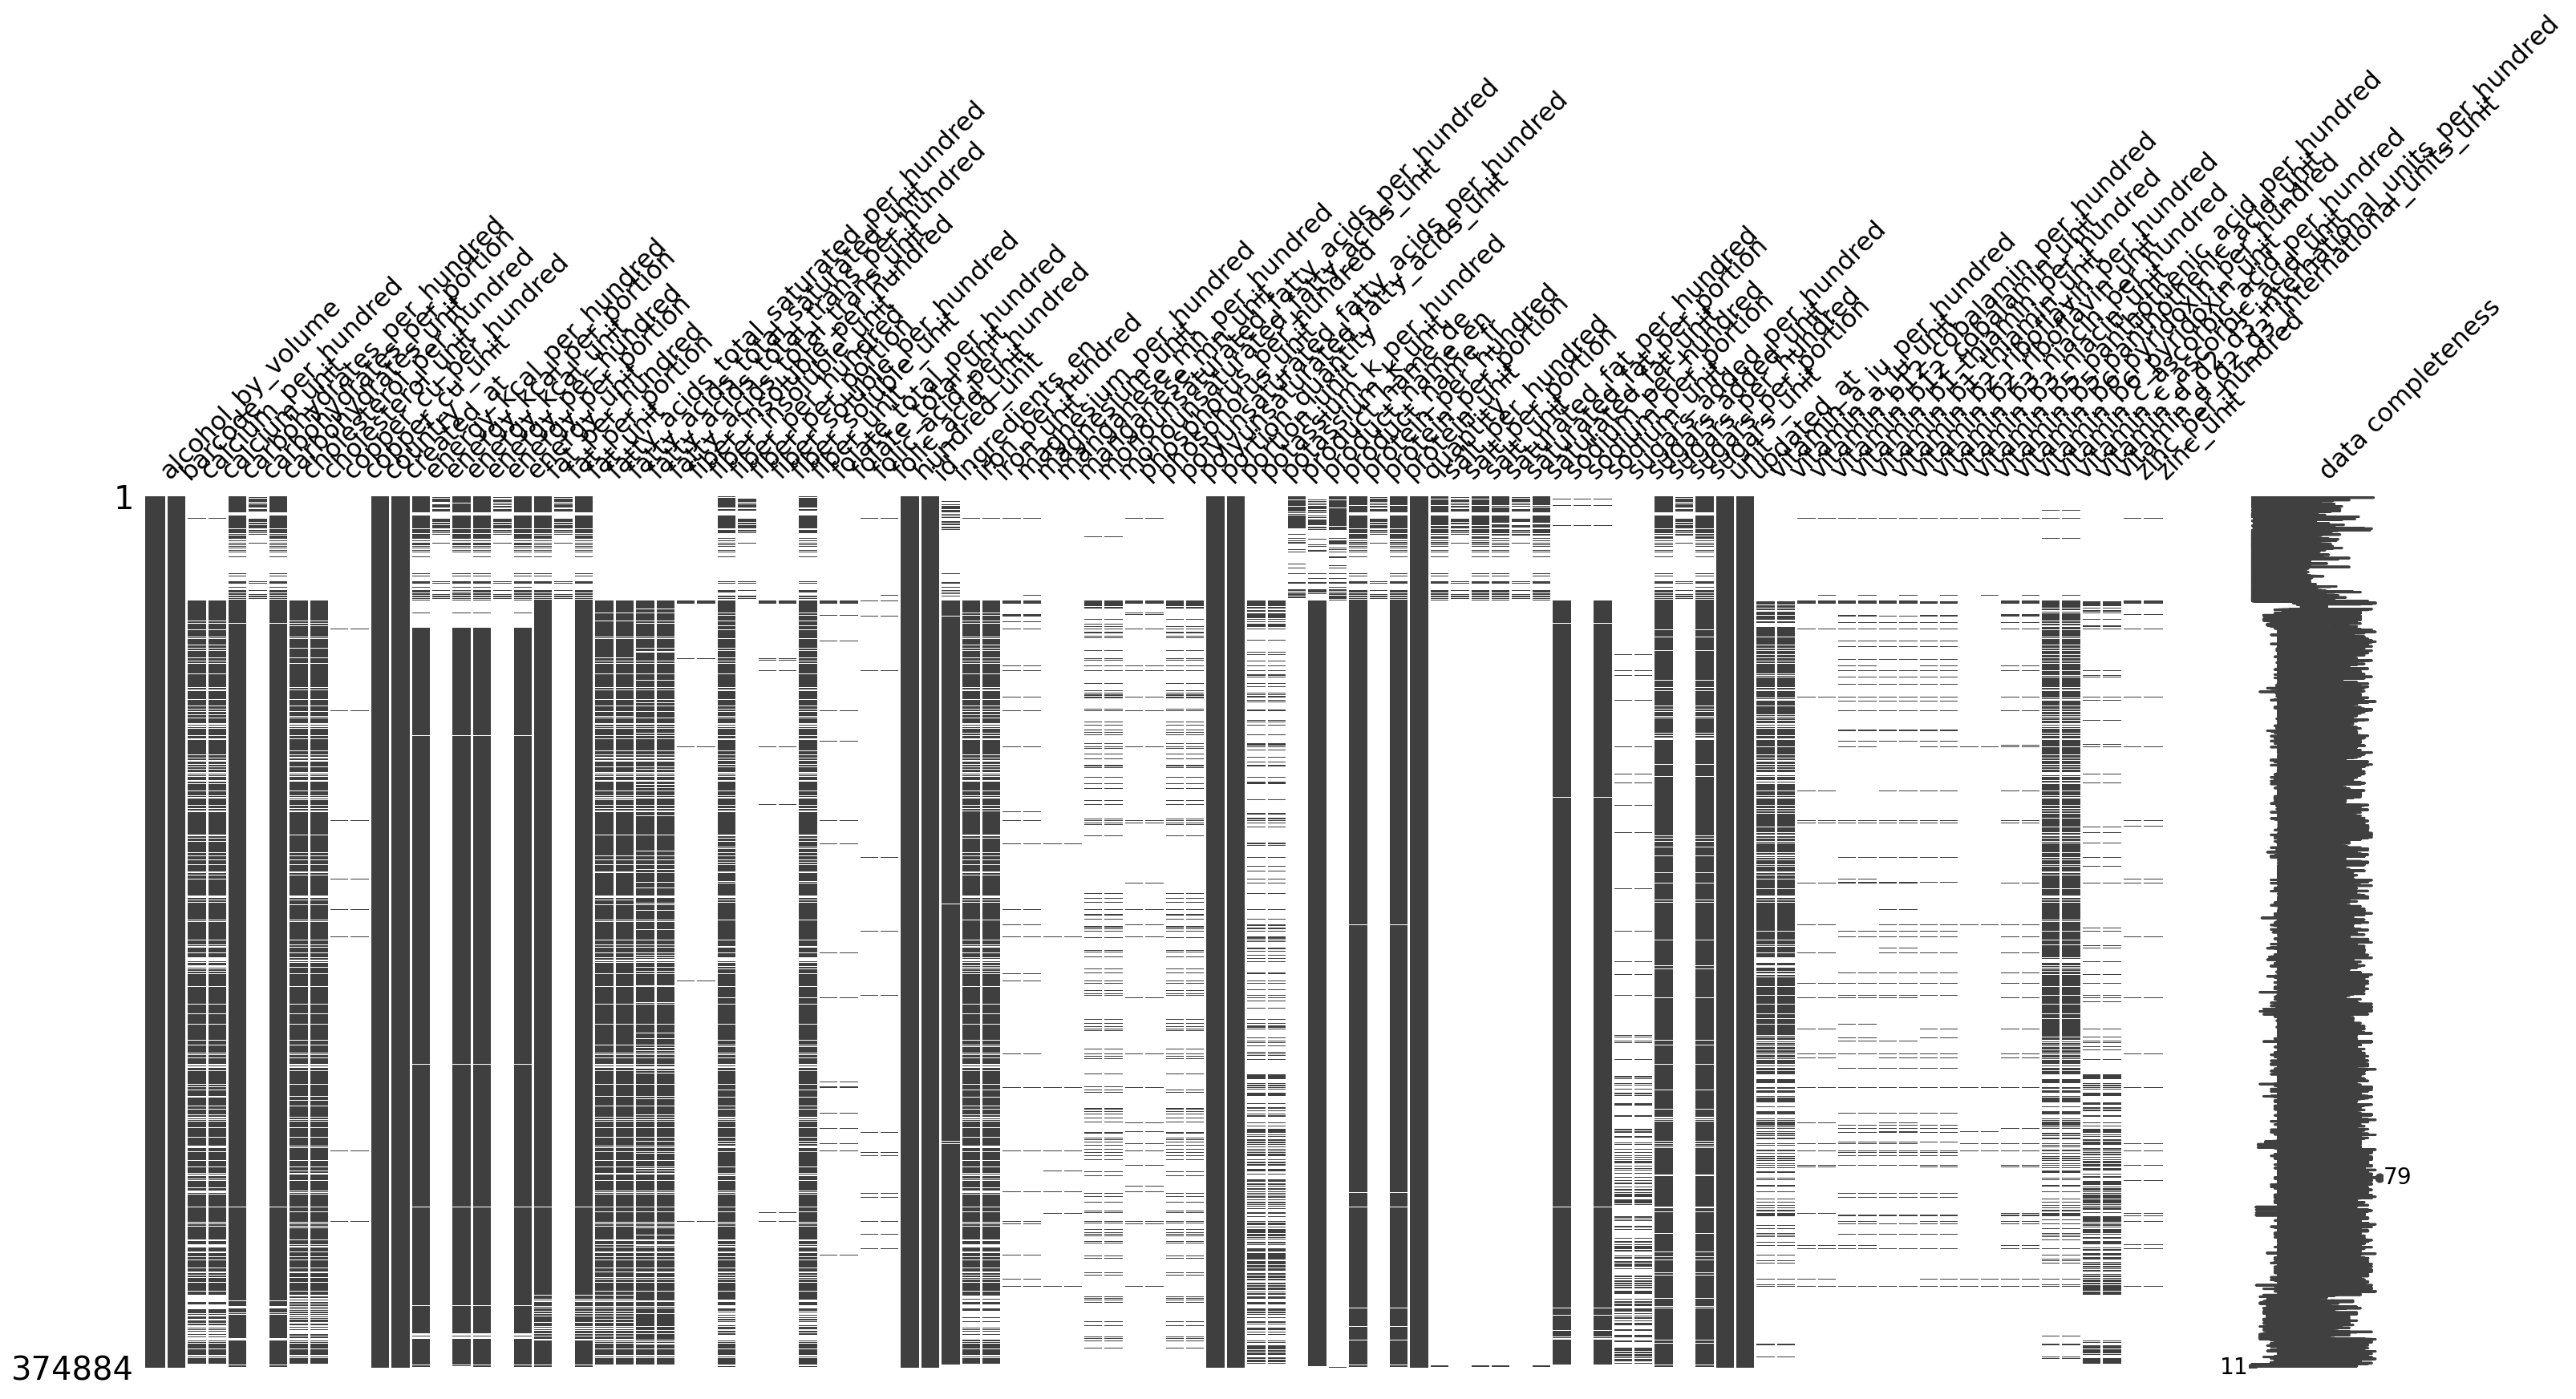

In [13]:
import missingno as msno

msno.matrix(df_openfood, labels=True);

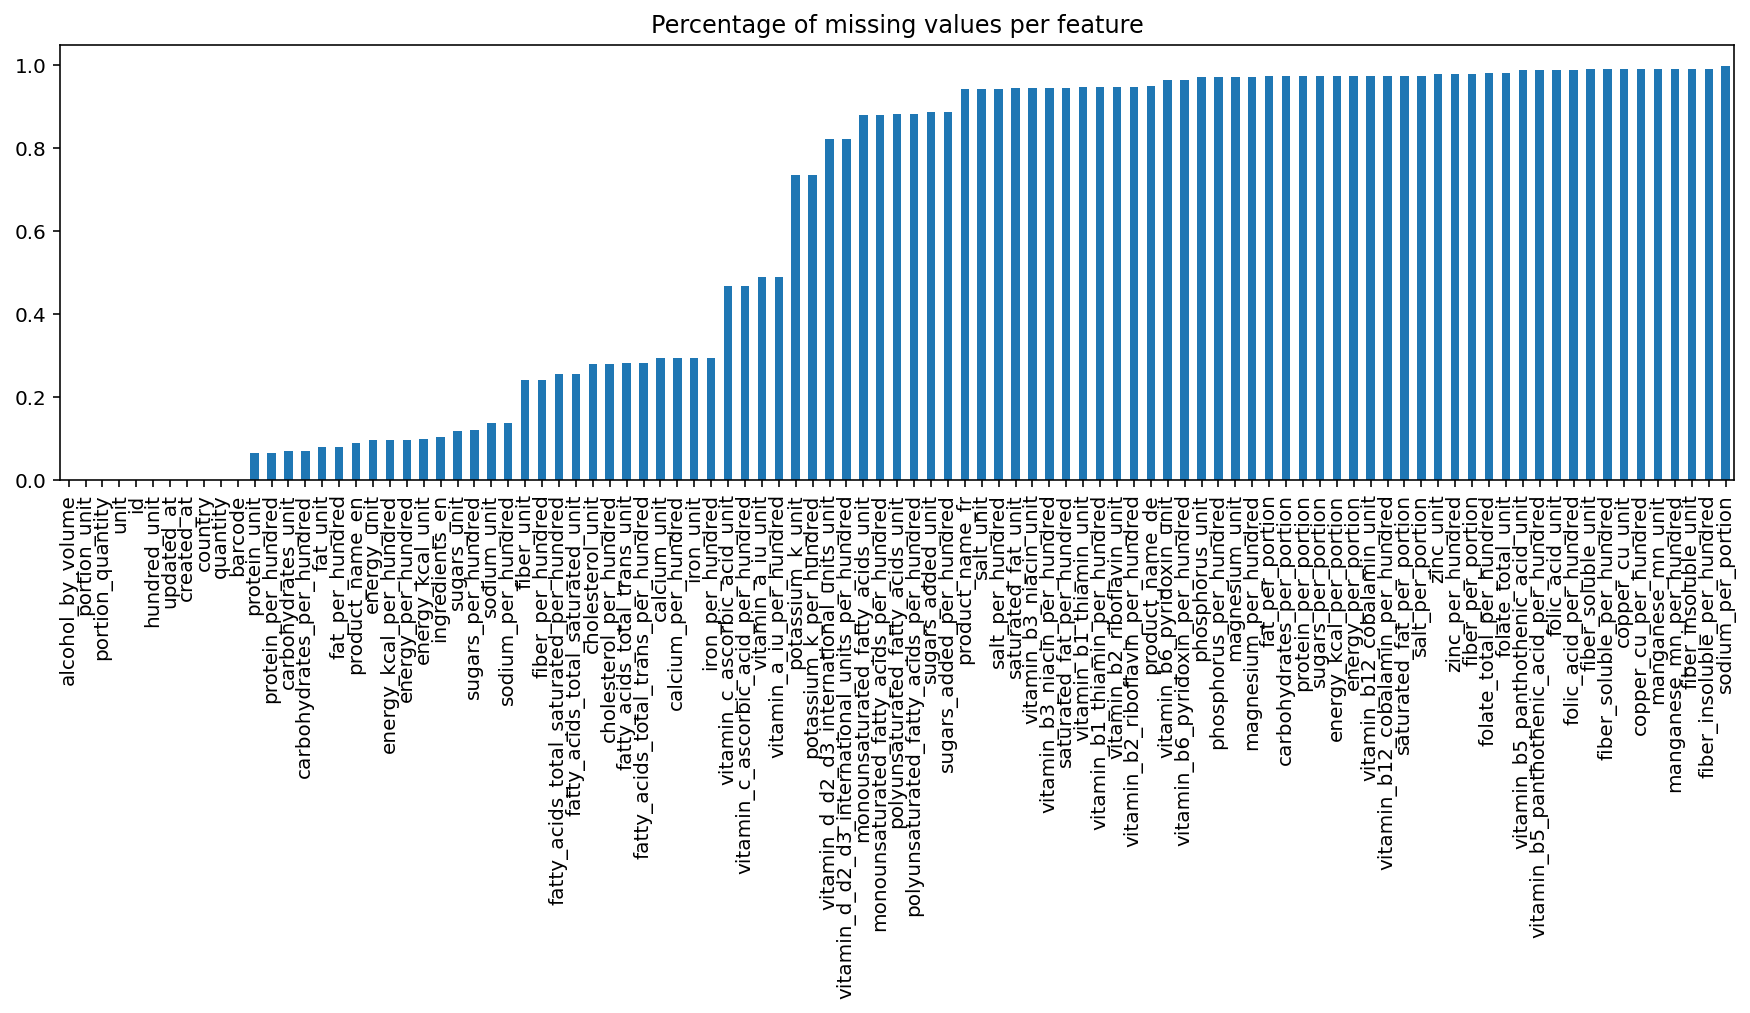

In [14]:
df_openfood.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4), title="Percentage of missing values per feature");

In [15]:
# Percentage of missing values per feature

((df_openfood.isna().sum()/385384)*100).sort_values(ascending=False) # you can use mean() instead

sodium_per_portion                                 97.080055
fiber_insoluble_per_hundred                        96.364924
fiber_insoluble_unit                               96.364665
manganese_mn_per_hundred                           96.358437
manganese_mn_unit                                  96.357659
copper_cu_per_hundred                              96.338457
copper_cu_unit                                     96.338457
fiber_soluble_per_hundred                          96.282409
fiber_soluble_unit                                 96.281890
folic_acid_per_hundred                             96.119195
folic_acid_unit                                    96.114265
vitamin_b5_panthothenic_acid_per_hundred           96.097139
vitamin_b5_panthothenic_acid_unit                  96.092469
folate_total_per_hundred                           95.278475
folate_total_unit                                  95.278475
fiber_per_portion                                  95.153665
zinc_per_hundred        

Hereabove we have the complete list of the percentages of missing values per feature.

In [16]:
df_openfood.isna().mean().mean()

0.6036885591761235

We have 60.36% of missing values in the whole dataset.

#### **3. Now that you know the extent of missing values in the data, you should address them. Your goal is to keep as much data as possible in your DataFrame. What is the shape of the remaining data?**

To not drop too many observations, we are going to fill some NaN values. For example, it is easy to assess the values of the NaN for the ```_unit``` columns. The value should be the same for the whole column.

- First, we take a look at all columns labels

In [17]:
df_openfood.columns

Index(['alcohol_by_volume', 'barcode', 'calcium_per_hundred', 'calcium_unit',
       'carbohydrates_per_hundred', 'carbohydrates_per_portion',
       'carbohydrates_unit', 'cholesterol_per_hundred', 'cholesterol_unit',
       'copper_cu_per_hundred', 'copper_cu_unit', 'country', 'created_at',
       'energy_kcal_per_hundred', 'energy_kcal_per_portion',
       'energy_kcal_unit', 'energy_per_hundred', 'energy_per_portion',
       'energy_unit', 'fat_per_hundred', 'fat_per_portion', 'fat_unit',
       'fatty_acids_total_saturated_per_hundred',
       'fatty_acids_total_saturated_unit',
       'fatty_acids_total_trans_per_hundred', 'fatty_acids_total_trans_unit',
       'fiber_insoluble_per_hundred', 'fiber_insoluble_unit',
       'fiber_per_hundred', 'fiber_per_portion', 'fiber_soluble_per_hundred',
       'fiber_soluble_unit', 'fiber_unit', 'folate_total_per_hundred',
       'folate_total_unit', 'folic_acid_per_hundred', 'folic_acid_unit',
       'hundred_unit', 'id', 'ingredients_en', 

- We select and put all columns containing ```_unit``` in their label in a new list. They are among the features that contain the highest percentages of missing values.

In [18]:
unit_cols = [col for col in df_openfood.columns if "_unit" in col]
unit_cols

['calcium_unit',
 'carbohydrates_unit',
 'cholesterol_unit',
 'copper_cu_unit',
 'energy_kcal_unit',
 'energy_unit',
 'fat_unit',
 'fatty_acids_total_saturated_unit',
 'fatty_acids_total_trans_unit',
 'fiber_insoluble_unit',
 'fiber_soluble_unit',
 'fiber_unit',
 'folate_total_unit',
 'folic_acid_unit',
 'hundred_unit',
 'iron_unit',
 'magnesium_unit',
 'manganese_mn_unit',
 'monounsaturated_fatty_acids_unit',
 'phosphorus_unit',
 'polyunsaturated_fatty_acids_unit',
 'portion_unit',
 'potassium_k_unit',
 'protein_unit',
 'salt_unit',
 'saturated_fat_unit',
 'sodium_unit',
 'sugars_added_unit',
 'sugars_unit',
 'vitamin_a_iu_unit',
 'vitamin_b12_cobalamin_unit',
 'vitamin_b1_thiamin_unit',
 'vitamin_b2_riboflavin_unit',
 'vitamin_b3_niacin_unit',
 'vitamin_b5_panthothenic_acid_unit',
 'vitamin_b6_pyridoxin_unit',
 'vitamin_c_ascorbic_acid_unit',
 'vitamin_d_d2_d3_international_units_per_hundred',
 'vitamin_d_d2_d3_international_units_unit',
 'zinc_unit']

In [19]:
type(unit_cols)

list

We just need to remove a feature (```vitamin_d_d2_d3_international_units_per_hundred```) that does not contain the information we want :

In [20]:
unit_cols.remove("vitamin_d_d2_d3_international_units_per_hundred")

# We also could have use regex to not take this feature into consideration

- Let's take a look at the values associated to each of the ```_unit``` features :

In [21]:
for col in unit_cols:
    print(col, df_openfood[col].unique())

calcium_unit [nan 'mg']
carbohydrates_unit ['g' nan]
cholesterol_unit [nan 'mg']
copper_cu_unit [nan 'mg']
energy_kcal_unit ['kCal' nan]
energy_unit ['kJ' nan]
fat_unit ['g' nan]
fatty_acids_total_saturated_unit [nan 'g']
fatty_acids_total_trans_unit [nan 'g']
fiber_insoluble_unit [nan 'g']
fiber_soluble_unit [nan 'g']
fiber_unit [nan 'g']
folate_total_unit [nan 'µg']
folic_acid_unit [nan 'µg']
hundred_unit ['g' 'ml' '?']
iron_unit [nan 'mg']
magnesium_unit [nan 'mg']
manganese_mn_unit [nan 'mg']
monounsaturated_fatty_acids_unit [nan 'g']
phosphorus_unit [nan 'mg']
polyunsaturated_fatty_acids_unit [nan 'g']
portion_unit ['g' 'ml' 'l' 'kg' 'Floz' 'dl' '?']
potassium_k_unit [nan 'mg']
protein_unit ['g' nan]
salt_unit [nan 'g']
saturated_fat_unit [nan 'g']
sodium_unit [nan 'g']
sugars_added_unit [nan 'g']
sugars_unit [nan 'g']
vitamin_a_iu_unit [nan 'IU']
vitamin_b12_cobalamin_unit [nan 'µg']
vitamin_b1_thiamin_unit [nan 'mg']
vitamin_b2_riboflavin_unit [nan 'mg']
vitamin_b3_niacin_unit [

- We can see above that in the ```_unit``` features we have the units we expect to see (g, mg, etc.), but we also have "NaN" (=missing values). We feel NaN values with the most common category of each column:

In [22]:
df_openfood = df_openfood.apply(lambda x: x.fillna(x.value_counts().index[0]))
df_openfood.head()

,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,...,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit
0,0.0,8001772000030,0.0,mg,75.00,37.50,g,0.0,mg,1.07,...,0.42,mg,0.08,mg,0.0,mg,0.0,IU,0.5,mg
1,0.0,7610809001066,0.0,mg,1.50,1.13,g,0.0,mg,1.07,...,0.42,mg,0.08,mg,0.0,mg,0.0,IU,0.5,mg
2,0.0,8002530159021,0.0,mg,52.68,0.00,g,0.0,mg,1.07,...,0.42,mg,0.08,mg,0.0,mg,0.0,IU,0.5,mg
3,0.0,3033715065788,0.0,mg,70.40,11.97,g,0.0,mg,1.07,...,0.42,mg,0.08,mg,0.0,mg,0.0,IU,0.5,mg
4,0.0,7610848492740,0.0,mg,37.00,7.40,g,0.0,mg,1.07,...,0.42,mg,0.08,mg,0.0,mg,0.0,IU,0.5,mg


In [23]:
for col in unit_cols:
    print(col, df_openfood[col].unique())

calcium_unit ['mg']
carbohydrates_unit ['g']
cholesterol_unit ['mg']
copper_cu_unit ['mg']
energy_kcal_unit ['kCal']
energy_unit ['kJ']
fat_unit ['g']
fatty_acids_total_saturated_unit ['g']
fatty_acids_total_trans_unit ['g']
fiber_insoluble_unit ['g']
fiber_soluble_unit ['g']
fiber_unit ['g']
folate_total_unit ['µg']
folic_acid_unit ['µg']
hundred_unit ['g' 'ml' '?']
iron_unit ['mg']
magnesium_unit ['mg']
manganese_mn_unit ['mg']
monounsaturated_fatty_acids_unit ['g']
phosphorus_unit ['mg']
polyunsaturated_fatty_acids_unit ['g']
portion_unit ['g' 'ml' 'l' 'kg' 'Floz' 'dl' '?']
potassium_k_unit ['mg']
protein_unit ['g']
salt_unit ['g']
saturated_fat_unit ['g']
sodium_unit ['g']
sugars_added_unit ['g']
sugars_unit ['g']
vitamin_a_iu_unit ['IU']
vitamin_b12_cobalamin_unit ['µg']
vitamin_b1_thiamin_unit ['mg']
vitamin_b2_riboflavin_unit ['mg']
vitamin_b3_niacin_unit ['mg']
vitamin_b5_panthothenic_acid_unit ['mg']
vitamin_b6_pyridoxin_unit ['mg']
vitamin_c_ascorbic_acid_unit ['mg']
vitamin_

Now we can see that there are no NaN values anymore in these columns. 

- Then, we decide to fill the NaN values of the numerical features with their median :

In [24]:
df_openfood.fillna(df_openfood.median(numeric_only = True))

,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,...,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit
0,0.0,8001772000030,0.0,mg,75.00,37.50,g,0.0,mg,1.07,...,0.42,mg,0.08,mg,0.0,mg,0.0,IU,0.5,mg
1,0.0,7610809001066,0.0,mg,1.50,1.13,g,0.0,mg,1.07,...,0.42,mg,0.08,mg,0.0,mg,0.0,IU,0.5,mg
2,0.0,8002530159021,0.0,mg,52.68,0.00,g,0.0,mg,1.07,...,0.42,mg,0.08,mg,0.0,mg,0.0,IU,0.5,mg
3,0.0,3033715065788,0.0,mg,70.40,11.97,g,0.0,mg,1.07,...,0.42,mg,0.08,mg,0.0,mg,0.0,IU,0.5,mg
4,0.0,7610848492740,0.0,mg,37.00,7.40,g,0.0,mg,1.07,...,0.42,mg,0.08,mg,0.0,mg,0.0,IU,0.5,mg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374879,0.0,7640145040283,0.0,mg,0.00,0.00,g,0.0,mg,1.07,...,0.42,mg,0.08,mg,0.0,mg,0.0,IU,0.5,mg
374880,0.0,7640147023628,850.0,mg,48.60,9.72,g,0.0,mg,1.07,...,45.00,mg,10.50,mg,500.0,mg,0.0,IU,37.5,mg
374881,0.0,3046920021593,0.0,mg,22.00,0.00,g,0.0,mg,1.07,...,0.42,mg,0.08,mg,0.0,mg,0.0,IU,0.5,mg
374882,0.0,4044889004335,0.0,mg,0.00,0.00,g,0.0,mg,1.07,...,0.42,mg,0.08,mg,0.0,mg,0.0,IU,0.5,mg


- Now, we choose to drop all the <u>features</u> that contain missing values :

In [25]:
df_openfood = df_openfood.dropna(axis=1) 
df_openfood.shape

(374884, 99)

No features have been dropped.

- Then, we choose drop the <u>rows</u> that have missing values:

In [26]:
df_openfood = df_openfood.dropna(axis=0)
df_openfood.shape

(374884, 99)

No rows have been drop.

- Let's take a look at our data :

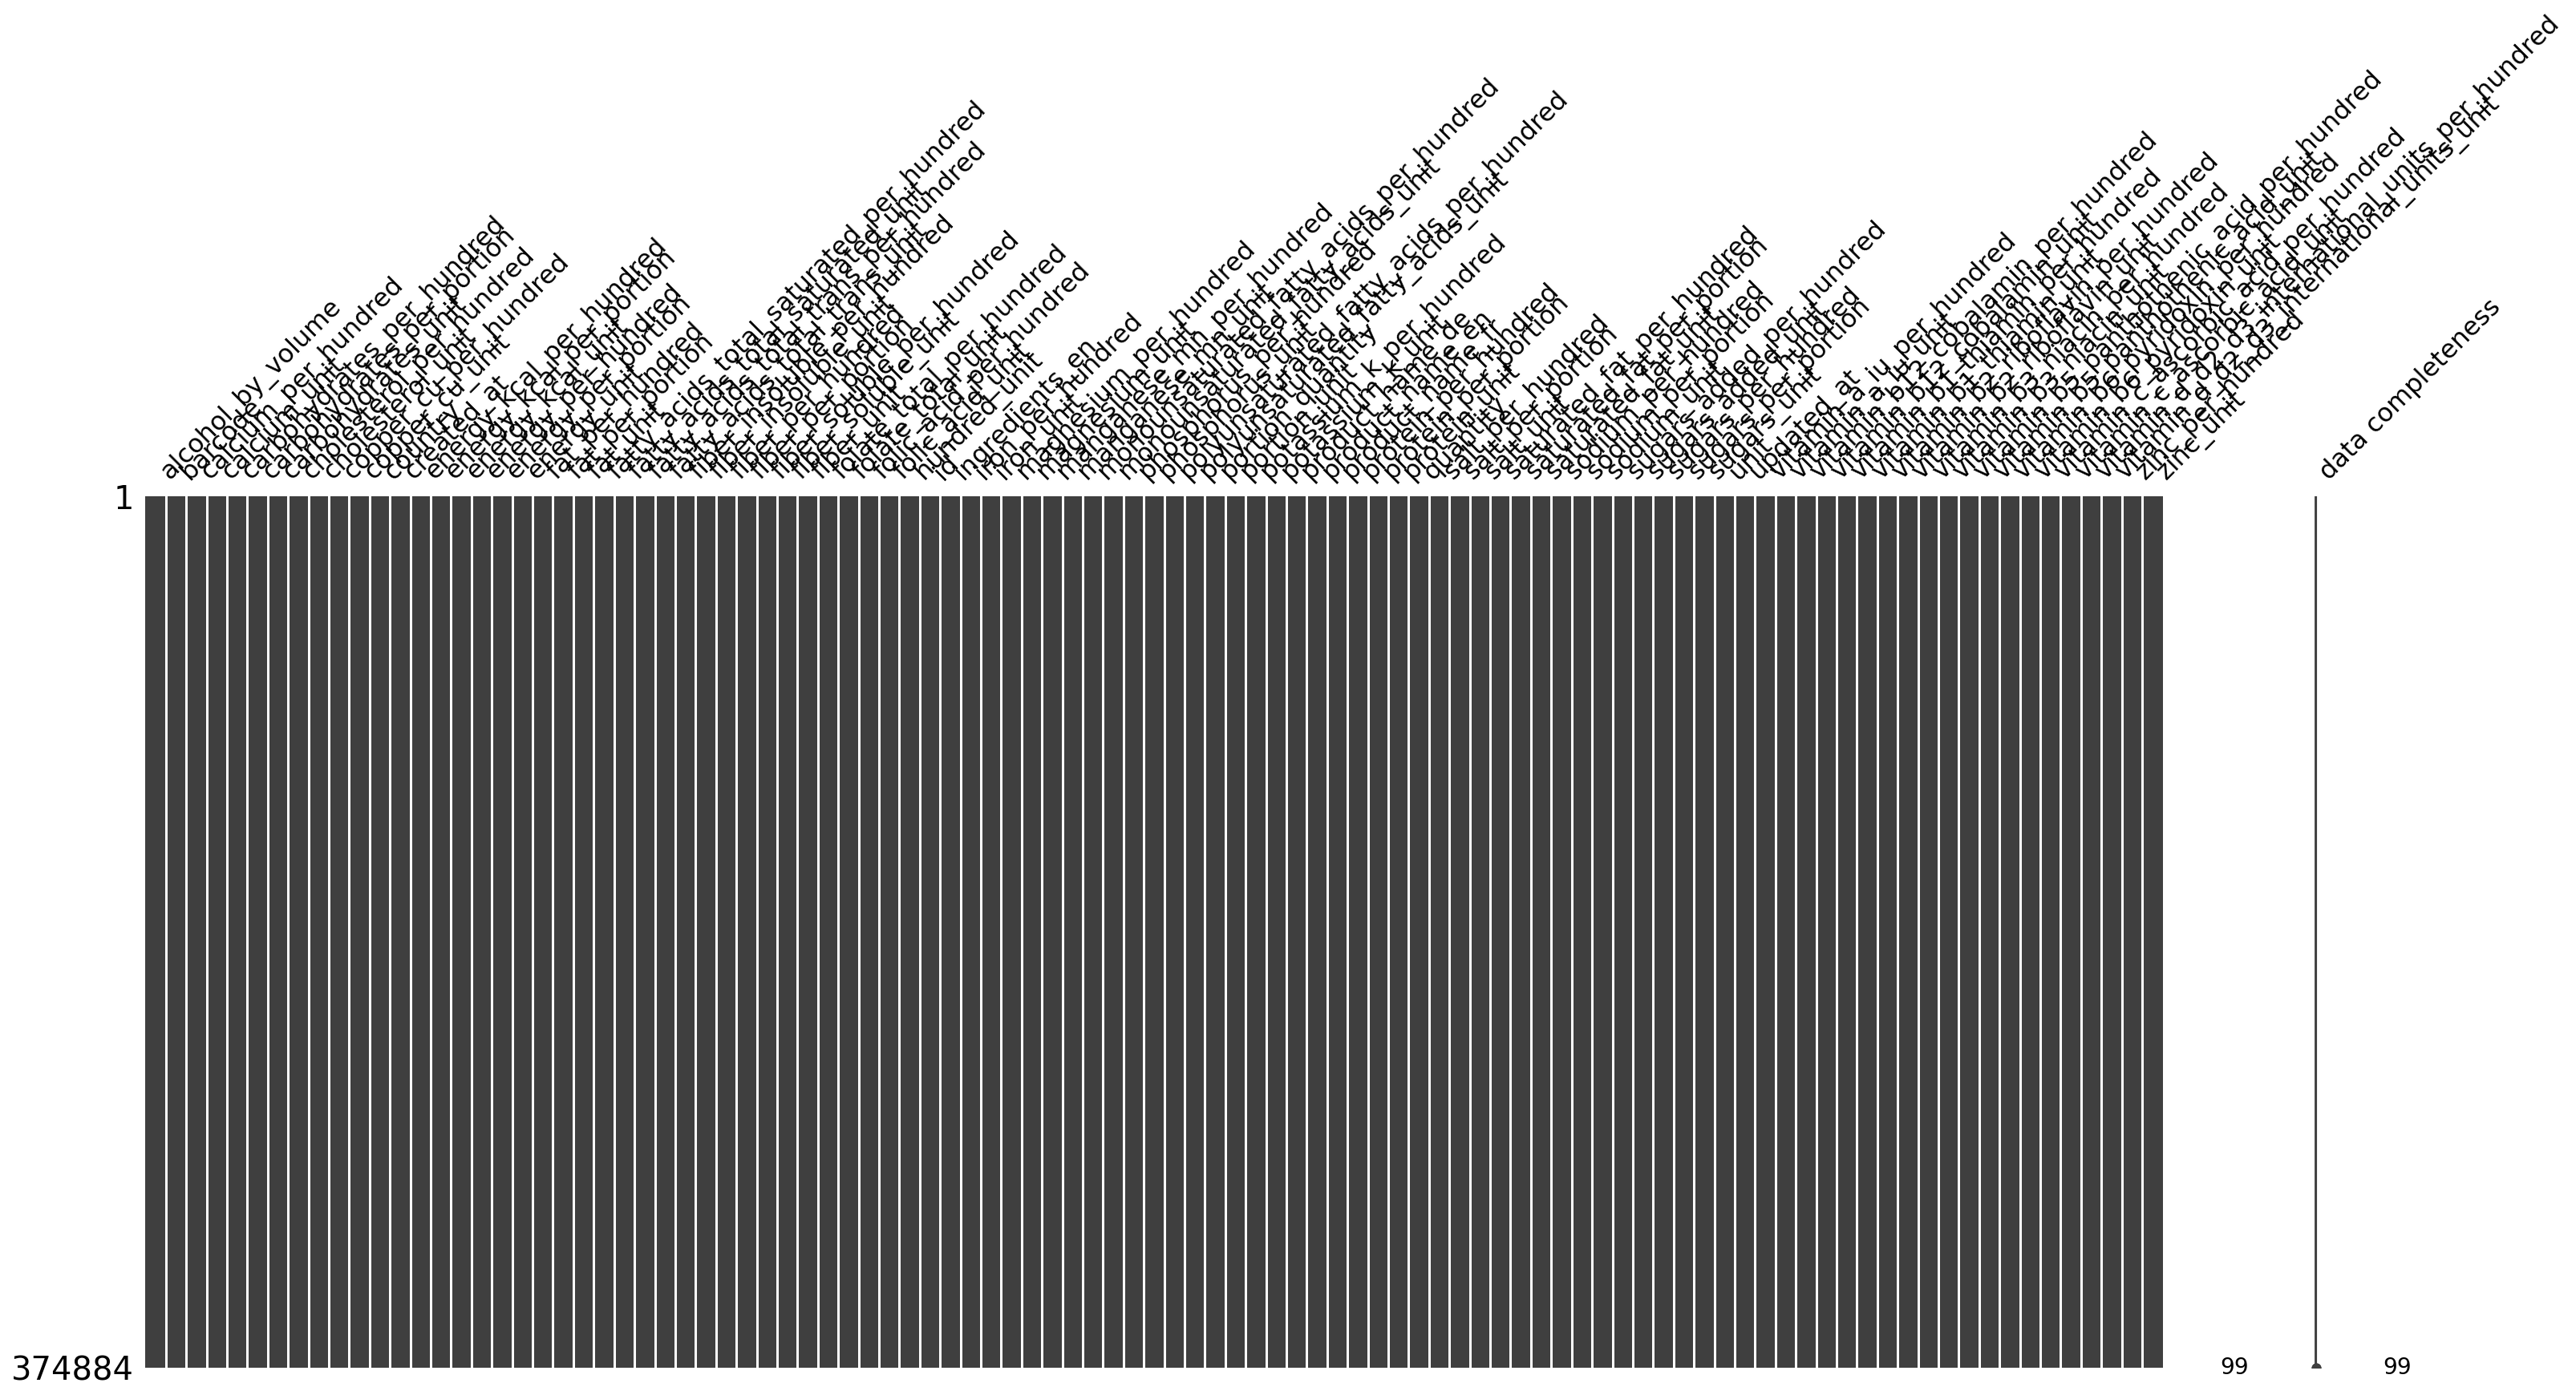

In [27]:
msno.matrix(df_openfood, labels=True);

We filled the NaN with their evident value (i.e. g, mg, etc, for ```_unit``` variables) or with the median for numerical variables. In the end, we only dropped the duplicates and manage to keep the rest of the observations.

#### **4. What is the number of unique values in categorical variables? Show the proportion of samples in each categorical level in the variables ```country``` and ```unit``` using appropriate visualizations.**

- We first take a look at the number of unique values per categorical variables :

In [28]:
# Number of unique values in categorical variables

pd.set_option('display.max_rows', 100)
df_openfood.select_dtypes(exclude=["number","int64"]).nunique(axis = 0).sort_values(ascending = False)

barcode                                     374446
ingredients_en                              247227
product_name_en                             222878
updated_at                                   47015
created_at                                   46990
product_name_fr                              20983
product_name_de                              18572
unit                                            10
portion_unit                                     7
country                                          7
hundred_unit                                     3
vitamin_d_d2_d3_international_units_unit         1
protein_unit                                     1
salt_unit                                        1
saturated_fat_unit                               1
sodium_unit                                      1
vitamin_c_ascorbic_acid_unit                     1
vitamin_b6_pyridoxin_unit                        1
sugars_added_unit                                1
vitamin_a_iu_unit              

- Then, we take a look at the proportion of samples per category in the ```country``` feature :

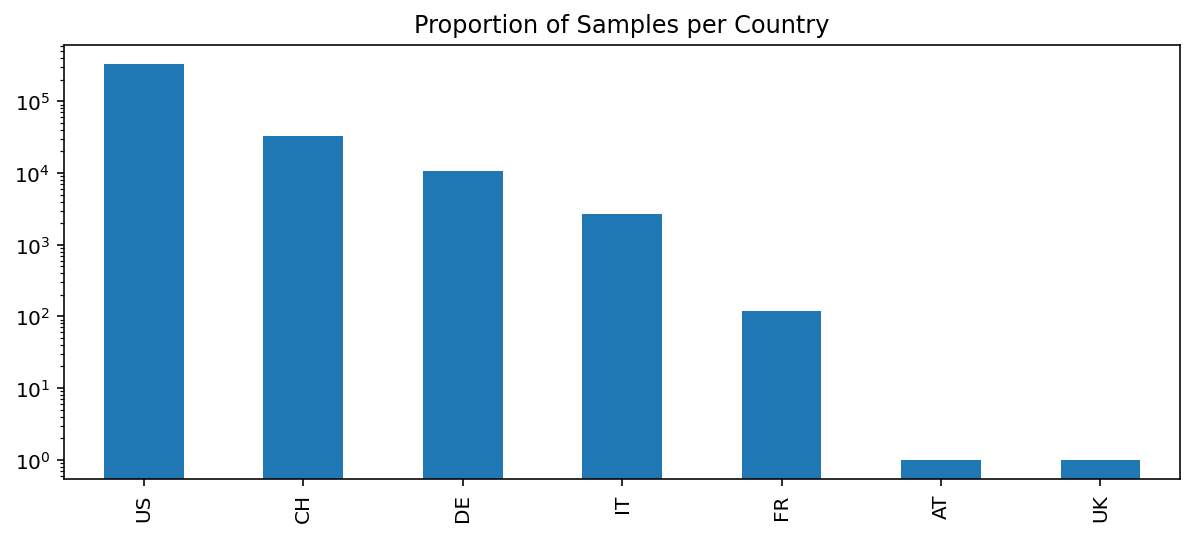

In [29]:
# Proportion of samples in categorical variable "Country"

df_openfood["country"].value_counts().plot(kind="bar", logy=True, 
                                           title="Proportion of Samples per Country", 
                                           figsize=(10,4));

We can have the same in absolute terms :

In [30]:
# Proportion of samples in each categorical variable "Country", in absolute terms.

df_openfood["country"].value_counts()

US    328289
CH     33117
DE     10639
IT      2719
FR       118
AT         1
UK         1
Name: country, dtype: int64

- Then, we take a look at the proportion of samples per category in the ```Unit``` feature :

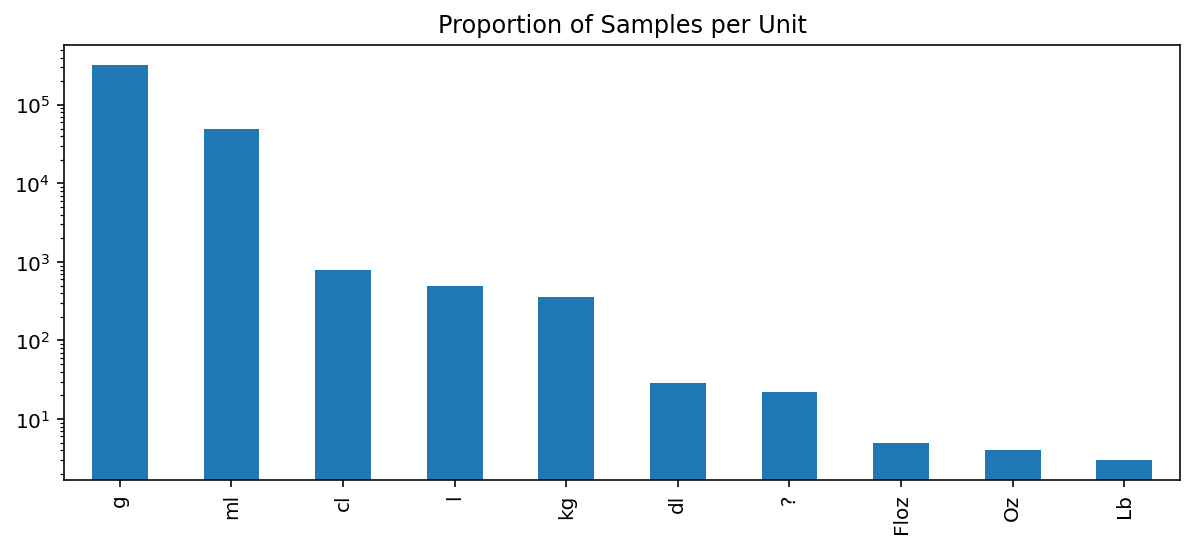

In [31]:
# Proportion of samples in the categorical variable "Unit"

df_openfood["unit"].value_counts().plot(kind="bar", logy=True, title= "Proportion of Samples per Unit", 
                                        figsize=(10,4));

Again, we can have the same information in absolute terms : 

In [32]:
df_openfood["unit"].value_counts()

g       324240
ml       48941
cl         787
l          495
kg         358
dl          29
?           22
Floz         5
Oz           4
Lb           3
Name: unit, dtype: int64

#### **5. Provide descriptive statistics (e.g., min/max/mean) and informative plots (e.g., histograms) of the numerical variables. You should obtain these plots as subplots.**

In [33]:
df_openfood.select_dtypes(include = "number").describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol_by_volume,374884.0,0.027911,0.769066,0.0,0.00,0.00,0.00,57.90
calcium_per_hundred,374884.0,82.410910,2150.662993,0.0,0.00,0.00,71.00,684000.00
carbohydrates_per_hundred,374884.0,31.616600,40.335465,0.0,4.67,20.00,57.14,6400.00
carbohydrates_per_portion,374884.0,0.532643,4.396976,0.0,0.00,0.00,0.00,150.50
cholesterol_per_hundred,374884.0,42.524086,1642.986819,0.0,0.00,0.00,10.00,250000.00
copper_cu_per_hundred,374884.0,1.112363,26.937281,0.0,1.07,1.07,1.07,16483.52
energy_kcal_per_hundred,374884.0,246.092327,258.352066,0.0,53.00,233.00,393.00,39600.00
energy_kcal_per_portion,374884.0,4.229471,34.200773,0.0,0.00,0.00,0.00,1508.00
energy_per_hundred,374884.0,1029.134302,1079.990782,0.0,221.75,974.87,1644.31,165686.40
energy_per_portion,374884.0,17.201325,139.765366,0.0,0.00,0.00,0.00,5212.00


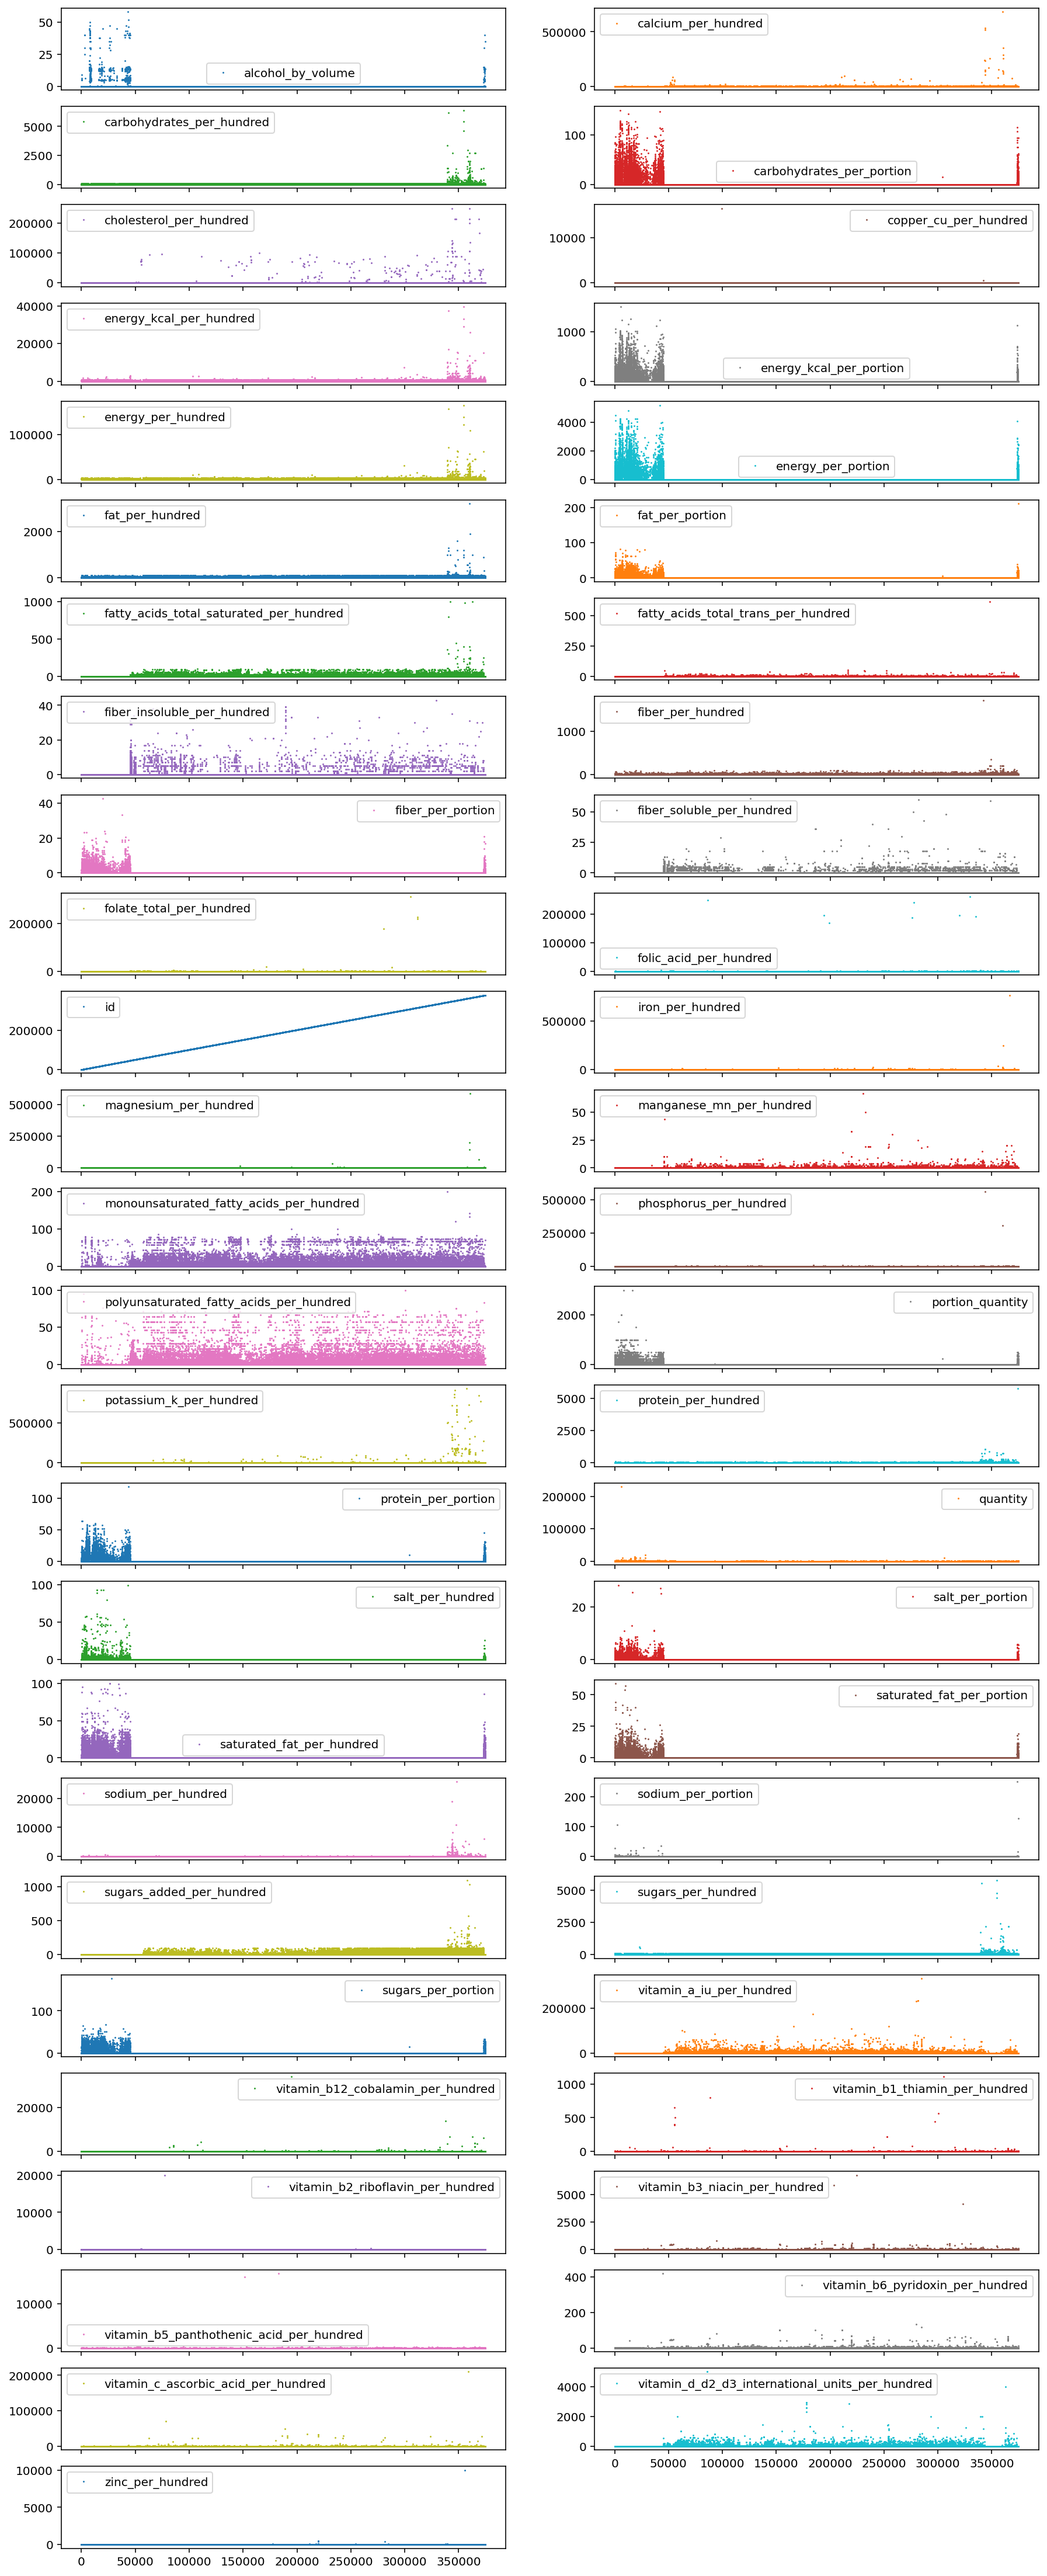

In [34]:
df_openfood.select_dtypes(include = "number").plot(lw=0, marker = ".", subplots=True, layout=(-1, 2), 
                                                   figsize=(15, 40), markersize=1);

#### **6. Address any unrealistic values or errors. The statistics and your plots of the per_hundred columns (e.g. ```protein_per_hundred```, ```fat_per_hundred```, etc.) can help you spot these values. Afterwards re-do the descriptive statistics and plots to check everything is ok now. Below are some additional tips and hints.**

**Create a new list to hold the columns with the per_hundred suffix in their names**

In [35]:
per100_columns_list = df_openfood.loc[:, df_openfood.columns.str.contains("per_hundred")].columns.to_list()
per100_columns_list

['calcium_per_hundred',
 'carbohydrates_per_hundred',
 'cholesterol_per_hundred',
 'copper_cu_per_hundred',
 'energy_kcal_per_hundred',
 'energy_per_hundred',
 'fat_per_hundred',
 'fatty_acids_total_saturated_per_hundred',
 'fatty_acids_total_trans_per_hundred',
 'fiber_insoluble_per_hundred',
 'fiber_per_hundred',
 'fiber_soluble_per_hundred',
 'folate_total_per_hundred',
 'folic_acid_per_hundred',
 'iron_per_hundred',
 'magnesium_per_hundred',
 'manganese_mn_per_hundred',
 'monounsaturated_fatty_acids_per_hundred',
 'phosphorus_per_hundred',
 'polyunsaturated_fatty_acids_per_hundred',
 'potassium_k_per_hundred',
 'protein_per_hundred',
 'salt_per_hundred',
 'saturated_fat_per_hundred',
 'sodium_per_hundred',
 'sugars_added_per_hundred',
 'sugars_per_hundred',
 'vitamin_a_iu_per_hundred',
 'vitamin_b12_cobalamin_per_hundred',
 'vitamin_b1_thiamin_per_hundred',
 'vitamin_b2_riboflavin_per_hundred',
 'vitamin_b3_niacin_per_hundred',
 'vitamin_b5_panthothenic_acid_per_hundred',
 'vitamin

**Create a new list to hold the columns with the ```_unit``` suffix in their names**

Here, we are just calling again the list we created earlier

In [36]:
unit_cols

['calcium_unit',
 'carbohydrates_unit',
 'cholesterol_unit',
 'copper_cu_unit',
 'energy_kcal_unit',
 'energy_unit',
 'fat_unit',
 'fatty_acids_total_saturated_unit',
 'fatty_acids_total_trans_unit',
 'fiber_insoluble_unit',
 'fiber_soluble_unit',
 'fiber_unit',
 'folate_total_unit',
 'folic_acid_unit',
 'hundred_unit',
 'iron_unit',
 'magnesium_unit',
 'manganese_mn_unit',
 'monounsaturated_fatty_acids_unit',
 'phosphorus_unit',
 'polyunsaturated_fatty_acids_unit',
 'portion_unit',
 'potassium_k_unit',
 'protein_unit',
 'salt_unit',
 'saturated_fat_unit',
 'sodium_unit',
 'sugars_added_unit',
 'sugars_unit',
 'vitamin_a_iu_unit',
 'vitamin_b12_cobalamin_unit',
 'vitamin_b1_thiamin_unit',
 'vitamin_b2_riboflavin_unit',
 'vitamin_b3_niacin_unit',
 'vitamin_b5_panthothenic_acid_unit',
 'vitamin_b6_pyridoxin_unit',
 'vitamin_c_ascorbic_acid_unit',
 'vitamin_d_d2_d3_international_units_unit',
 'zinc_unit']

**The range of acceptable values in each column depends on the unit of each column. You can find the unit of each column in the associated unit column. For example, the ```protein_per_hundred``` column unit is found in the ```protein_unit``` column, etc.**

So first, let's take a look at the unit for each columns :

In [37]:
for col in unit_cols:
    print(col, df_openfood[col].unique())

calcium_unit ['mg']
carbohydrates_unit ['g']
cholesterol_unit ['mg']
copper_cu_unit ['mg']
energy_kcal_unit ['kCal']
energy_unit ['kJ']
fat_unit ['g']
fatty_acids_total_saturated_unit ['g']
fatty_acids_total_trans_unit ['g']
fiber_insoluble_unit ['g']
fiber_soluble_unit ['g']
fiber_unit ['g']
folate_total_unit ['µg']
folic_acid_unit ['µg']
hundred_unit ['g' 'ml' '?']
iron_unit ['mg']
magnesium_unit ['mg']
manganese_mn_unit ['mg']
monounsaturated_fatty_acids_unit ['g']
phosphorus_unit ['mg']
polyunsaturated_fatty_acids_unit ['g']
portion_unit ['g' 'ml' 'l' 'kg' 'Floz' 'dl' '?']
potassium_k_unit ['mg']
protein_unit ['g']
salt_unit ['g']
saturated_fat_unit ['g']
sodium_unit ['g']
sugars_added_unit ['g']
sugars_unit ['g']
vitamin_a_iu_unit ['IU']
vitamin_b12_cobalamin_unit ['µg']
vitamin_b1_thiamin_unit ['mg']
vitamin_b2_riboflavin_unit ['mg']
vitamin_b3_niacin_unit ['mg']
vitamin_b5_panthothenic_acid_unit ['mg']
vitamin_b6_pyridoxin_unit ['mg']
vitamin_c_ascorbic_acid_unit ['mg']
vitamin_

We are going to put each column labels in seperate lists depending on their associated unit. It will be helpful for later :

In [38]:
g_cols_list = []
mg_cols_list = []
kCal_cols_list = []
kJ_cols_list = []
µg_cols_list = []
IU_cols_list = []

for col in unit_cols :
    if (df_openfood[col].unique() == ["g"]).any():
        g_cols_list.append(col)
    elif (df_openfood[col].unique() == ["mg"]).any():
        mg_cols_list.append(col)
    elif (df_openfood[col].unique() == ["kCal"]).any():
        kCal_cols_list.append(col)
    elif (df_openfood[col].unique() == ["kJ"]).any():
        kJ_cols_list.append(col)
    elif (df_openfood[col].unique() == ["µg"]).any():
        µg_cols_list.append(col)
    elif (df_openfood[col].unique() == ["IU"]).any():
        IU_cols_list.append(col)

- **We know that :**

    1) **The unit of the ```protein_per_hundred``` column is ```g```, which means that the values in this column should range between ```0``` and ```100```.**

    2) **If a column’s unit is ```mg```, then the values should range between ```0``` and ```100'000```**

    3) **If a column’s unit is in International units (IU), you can use the “Mass equivalents of 1 IU” indicated on the Wikipedia page to define an upper threshold value.**

If we look at the min and max values of each column, we know if our features respect the points listed above :

In [39]:
for per100 in per100_columns_list:
    print(per100,df_openfood[per100].min(), df_openfood[per100].max())

calcium_per_hundred 0.0 684000.0
carbohydrates_per_hundred 0.0 6400.0
cholesterol_per_hundred 0.0 250000.0
copper_cu_per_hundred 0.0 16483.52
energy_kcal_per_hundred 0.0 39600.0
energy_per_hundred 0.0 165686.4
fat_per_hundred 0.0 3200.0
fatty_acids_total_saturated_per_hundred 0.0 1000.0
fatty_acids_total_trans_per_hundred 0.0 615.38
fiber_insoluble_per_hundred 0.0 43.0
fiber_per_hundred 0.0 1730.0
fiber_soluble_per_hundred 0.0 61.0
folate_total_per_hundred 0.0 311111.0
folic_acid_per_hundred 0.0 261364.0
iron_per_hundred 0.0 769230.77
magnesium_per_hundred 0.0 585714.0
manganese_mn_per_hundred 0.0 67.0
monounsaturated_fatty_acids_per_hundred 0.0 200.0
phosphorus_per_hundred 0.0 559459.0
polyunsaturated_fatty_acids_per_hundred 0.0 100.0
potassium_k_per_hundred 0.0 925000.0
protein_per_hundred 0.0 5747.0
salt_per_hundred 0.0 99.8
saturated_fat_per_hundred 0.0 100.0
sodium_per_hundred 0.0 25833.33
sugars_added_per_hundred 0.0 1100.0
sugars_per_hundred 0.0 5800.0
vitamin_a_iu_per_hundred 0

Just by taking a quick look above, we can see that some features have values that exceed their theorical limits. For example, there should not be values above 100g in the ```sugars_per_hundred``` products. Thus, we are going to remove these exceeding values.

**Removal of the errors :**

- For "g" ```_unit```columns:

In [40]:
g_cols_list

['carbohydrates_unit',
 'fat_unit',
 'fatty_acids_total_saturated_unit',
 'fatty_acids_total_trans_unit',
 'fiber_insoluble_unit',
 'fiber_soluble_unit',
 'fiber_unit',
 'hundred_unit',
 'monounsaturated_fatty_acids_unit',
 'polyunsaturated_fatty_acids_unit',
 'portion_unit',
 'protein_unit',
 'salt_unit',
 'saturated_fat_unit',
 'sodium_unit',
 'sugars_added_unit',
 'sugars_unit']

In [41]:
g_list_per100 = [g.replace('_unit', '_per_hundred') for g in g_cols_list]
g_list_per100

['carbohydrates_per_hundred',
 'fat_per_hundred',
 'fatty_acids_total_saturated_per_hundred',
 'fatty_acids_total_trans_per_hundred',
 'fiber_insoluble_per_hundred',
 'fiber_soluble_per_hundred',
 'fiber_per_hundred',
 'hundred_per_hundred',
 'monounsaturated_fatty_acids_per_hundred',
 'polyunsaturated_fatty_acids_per_hundred',
 'portion_per_hundred',
 'protein_per_hundred',
 'salt_per_hundred',
 'saturated_fat_per_hundred',
 'sodium_per_hundred',
 'sugars_added_per_hundred',
 'sugars_per_hundred']

In [42]:
g_to_drop = df_openfood[['carbohydrates_per_hundred','fat_per_hundred',
                         'fatty_acids_total_saturated_per_hundred','fatty_acids_total_trans_per_hundred',
                         'fiber_insoluble_per_hundred','fiber_soluble_per_hundred',
                         'fiber_per_hundred','monounsaturated_fatty_acids_per_hundred',
                         'polyunsaturated_fatty_acids_per_hundred','protein_per_hundred','salt_per_hundred',
                         'saturated_fat_per_hundred','sodium_per_hundred','sugars_added_per_hundred',
                         'sugars_per_hundred']].gt(100)
print(g_to_drop.sum())

# We had to ignore some of the features g_cols_list

carbohydrates_per_hundred                  1076
fat_per_hundred                             136
fatty_acids_total_saturated_per_hundred      32
fatty_acids_total_trans_per_hundred           1
fiber_insoluble_per_hundred                   0
fiber_soluble_per_hundred                     0
fiber_per_hundred                            21
monounsaturated_fatty_acids_per_hundred       4
polyunsaturated_fatty_acids_per_hundred       0
protein_per_hundred                         172
salt_per_hundred                              0
saturated_fat_per_hundred                     0
sodium_per_hundred                          188
sugars_added_per_hundred                     96
sugars_per_hundred                          443
dtype: int64


In [43]:
g_filter_any = g_to_drop.any(axis = 1)

In [44]:
g_errors = df_openfood.loc[g_filter_any,:]
g_errors.shape

#  "Note that we got fewer outliers than the 3046 we calculated earlier. This is due to the fact that some samples were 
# flagged as outliers in more than 1 column."

(1408, 99)

In [45]:
# Shape of our data before filtering 

df_openfood.shape

(374884, 99)

In [46]:
df_openfood = df_openfood.drop(g_errors.index, axis=0)
df_openfood.shape

(373476, 99)

- For "mg" ```_unit```columns (same as above, so we do not detail each of the steps) :

In [47]:
mg_cols_list

['calcium_unit',
 'cholesterol_unit',
 'copper_cu_unit',
 'iron_unit',
 'magnesium_unit',
 'manganese_mn_unit',
 'phosphorus_unit',
 'potassium_k_unit',
 'vitamin_b1_thiamin_unit',
 'vitamin_b2_riboflavin_unit',
 'vitamin_b3_niacin_unit',
 'vitamin_b5_panthothenic_acid_unit',
 'vitamin_b6_pyridoxin_unit',
 'vitamin_c_ascorbic_acid_unit',
 'zinc_unit']

In [48]:
mg_list_per100 = [mg.replace('_unit', '_per_hundred') for mg in mg_cols_list]
mg_list_per100

['calcium_per_hundred',
 'cholesterol_per_hundred',
 'copper_cu_per_hundred',
 'iron_per_hundred',
 'magnesium_per_hundred',
 'manganese_mn_per_hundred',
 'phosphorus_per_hundred',
 'potassium_k_per_hundred',
 'vitamin_b1_thiamin_per_hundred',
 'vitamin_b2_riboflavin_per_hundred',
 'vitamin_b3_niacin_per_hundred',
 'vitamin_b5_panthothenic_acid_per_hundred',
 'vitamin_b6_pyridoxin_per_hundred',
 'vitamin_c_ascorbic_acid_per_hundred',
 'zinc_per_hundred']

In [49]:
mg_to_drop = df_openfood[['calcium_per_hundred','cholesterol_per_hundred','copper_cu_per_hundred','iron_per_hundred',
                          'magnesium_per_hundred','manganese_mn_per_hundred','phosphorus_per_hundred',
                          'potassium_k_per_hundred','vitamin_b1_thiamin_per_hundred',
                          'vitamin_b2_riboflavin_per_hundred','vitamin_b3_niacin_per_hundred',
                          'vitamin_b5_panthothenic_acid_per_hundred','vitamin_b6_pyridoxin_per_hundred',
                          'vitamin_c_ascorbic_acid_per_hundred','zinc_per_hundred']].gt(100000)
print(mg_to_drop.sum())

calcium_per_hundred                         17
cholesterol_per_hundred                     17
copper_cu_per_hundred                        0
iron_per_hundred                             2
magnesium_per_hundred                        3
manganese_mn_per_hundred                     0
phosphorus_per_hundred                       2
potassium_k_per_hundred                     74
vitamin_b1_thiamin_per_hundred               0
vitamin_b2_riboflavin_per_hundred            0
vitamin_b3_niacin_per_hundred                0
vitamin_b5_panthothenic_acid_per_hundred     0
vitamin_b6_pyridoxin_per_hundred             0
vitamin_c_ascorbic_acid_per_hundred          1
zinc_per_hundred                             0
dtype: int64


In [50]:
mg_to_drop.sum().sum()

116

In [51]:
mg_filter_any = mg_to_drop.any(axis = 1)

In [52]:
mg_errors = df_openfood.loc[mg_filter_any,:]
mg_errors.shape

(116, 99)

In [53]:
df_openfood = df_openfood.drop(mg_errors.index, axis=0)
df_openfood.shape

(373360, 99)

- For "kCal" ```_unit```columns:

In [54]:
kCal_cols_list

['energy_kcal_unit']

In [55]:
kCal_list_per100 = [kCal.replace('_unit', '_per_hundred') for kCal in kCal_cols_list]
kCal_list_per100

['energy_kcal_per_hundred']

In [56]:
kCal_to_drop = df_openfood[["energy_kcal_per_hundred"]].gt(772)
print(kCal_to_drop.sum())
                           
# If 1 g = 7.7162 kcal

energy_kcal_per_hundred    3895
dtype: int64


In [57]:
kCal_to_drop.sum().sum()

3895

In [58]:
kCal_filter_any = kCal_to_drop.any(axis = 1)

In [59]:
kCal_errors = df_openfood.loc[kCal_filter_any,:]
kCal_errors.shape

(3895, 99)

In [60]:
df_openfood = df_openfood.drop(kCal_errors.index, axis=0)
df_openfood.shape

(369465, 99)

- For "kJ" ```_unit``` columns :

In [61]:
kJ_cols_list

['energy_unit']

In [62]:
kJ_to_drop = df_openfood[["energy_per_hundred"]].gt(3233)
print(kJ_to_drop.sum())

# 1 kJ = 0,2388 kCal , 772 kCal = 100g, 772 kCal = 3233 kJ

energy_per_hundred    1
dtype: int64


In [63]:
kJ_filter_any = kJ_to_drop.any(axis = 1)

In [64]:
kJ_errors = df_openfood.loc[kJ_filter_any,:]
kJ_errors.shape

(1, 99)

In [65]:
df_openfood = df_openfood.drop(kJ_errors.index, axis=0)
df_openfood.shape

(369464, 99)

- For "µg" ```_unit```columns :

In [66]:
µg_cols_list

['folate_total_unit', 'folic_acid_unit', 'vitamin_b12_cobalamin_unit']

In [67]:
µg_list_per100 = [µg.replace('_unit', '_per_hundred') for µg in µg_cols_list]
µg_list_per100

['folate_total_per_hundred',
 'folic_acid_per_hundred',
 'vitamin_b12_cobalamin_per_hundred']

In [68]:
µg_to_drop = df_openfood[['folate_total_per_hundred','folic_acid_per_hundred',
                          'vitamin_b12_cobalamin_per_hundred']].gt(100000000)
print(µg_to_drop.sum())

# 100g = 100'000'000 micrograms

folate_total_per_hundred             0
folic_acid_per_hundred               0
vitamin_b12_cobalamin_per_hundred    0
dtype: int64


- For "IU" ```_unit```columns :

In [69]:
IU_cols_list

['vitamin_a_iu_unit', 'vitamin_d_d2_d3_international_units_unit']

In [70]:
IU_list_per100 = [IU.replace('_unit', '_per_hundred') for IU in IU_cols_list]
IU_list_per100

['vitamin_a_iu_per_hundred',
 'vitamin_d_d2_d3_international_per_hundreds_per_hundred']

In [71]:
IU_to_drop = df_openfood[['vitamin_a_iu_per_hundred','vitamin_d_d2_d3_international_units_per_hundred']].gt(333333000)
print(IU_to_drop.sum())

# 100g = 333333000 IU

vitamin_a_iu_per_hundred                           0
vitamin_d_d2_d3_international_units_per_hundred    0
dtype: int64


#### **7. Do you spot any other inconsistencies in the data? What about the sum of a product’s protein, fat, carbohydrates, salt, and fiber content?**

In [72]:
# New column sum of protein, fat, carbohydrates, salt and fiber

df_openfood["Sum_of_ingredients"] = (df_openfood["protein_per_hundred"]+ df_openfood["fat_per_hundred"] + 
                                     df_openfood["carbohydrates_per_hundred"]+ df_openfood["fiber_per_hundred"] + 
                                     df_openfood["salt_per_hundred"])

In [73]:
sum_list = df_openfood[["protein_per_hundred","fat_per_hundred","carbohydrates_per_hundred", "salt_per_hundred", 
                        "fiber_per_hundred"]].columns.tolist()

In [74]:
sum_nutr_unit = [nutr.replace('_per_hundred','_unit' ) for nutr in sum_list]
sum_nutr_unit

['protein_unit', 'fat_unit', 'carbohydrates_unit', 'salt_unit', 'fiber_unit']

In [75]:
for col in sum_nutr_unit:
    print(col, df_openfood[col].unique())

protein_unit ['g']
fat_unit ['g']
carbohydrates_unit ['g']
salt_unit ['g']
fiber_unit ['g']


In [76]:
df_openfood[["protein_per_hundred","fat_per_hundred","carbohydrates_per_hundred", "salt_per_hundred", "fiber_per_hundred",
             "Sum_of_ingredients"]].describe().T

,count,mean,std,min,25%,50%,75%,max
protein_per_hundred,369464.0,6.722174,8.455235,0.0,0.00,3.86,9.80,100.0
fat_per_hundred,369464.0,10.745304,14.354032,0.0,0.00,3.57,17.86,100.0
carbohydrates_per_hundred,369464.0,31.259487,29.386487,0.0,5.00,20.00,57.14,100.0
salt_per_hundred,369464.0,0.057172,0.801607,0.0,0.00,0.00,0.00,99.8
fiber_per_hundred,369464.0,2.211091,4.184172,0.0,0.00,0.30,3.10,100.0
Sum_of_ingredients,369464.0,50.995229,37.076254,0.0,15.79,46.63,90.02,300.0


As these nutrients are mesured in grams, there can not be more than 100g of those in a single product.

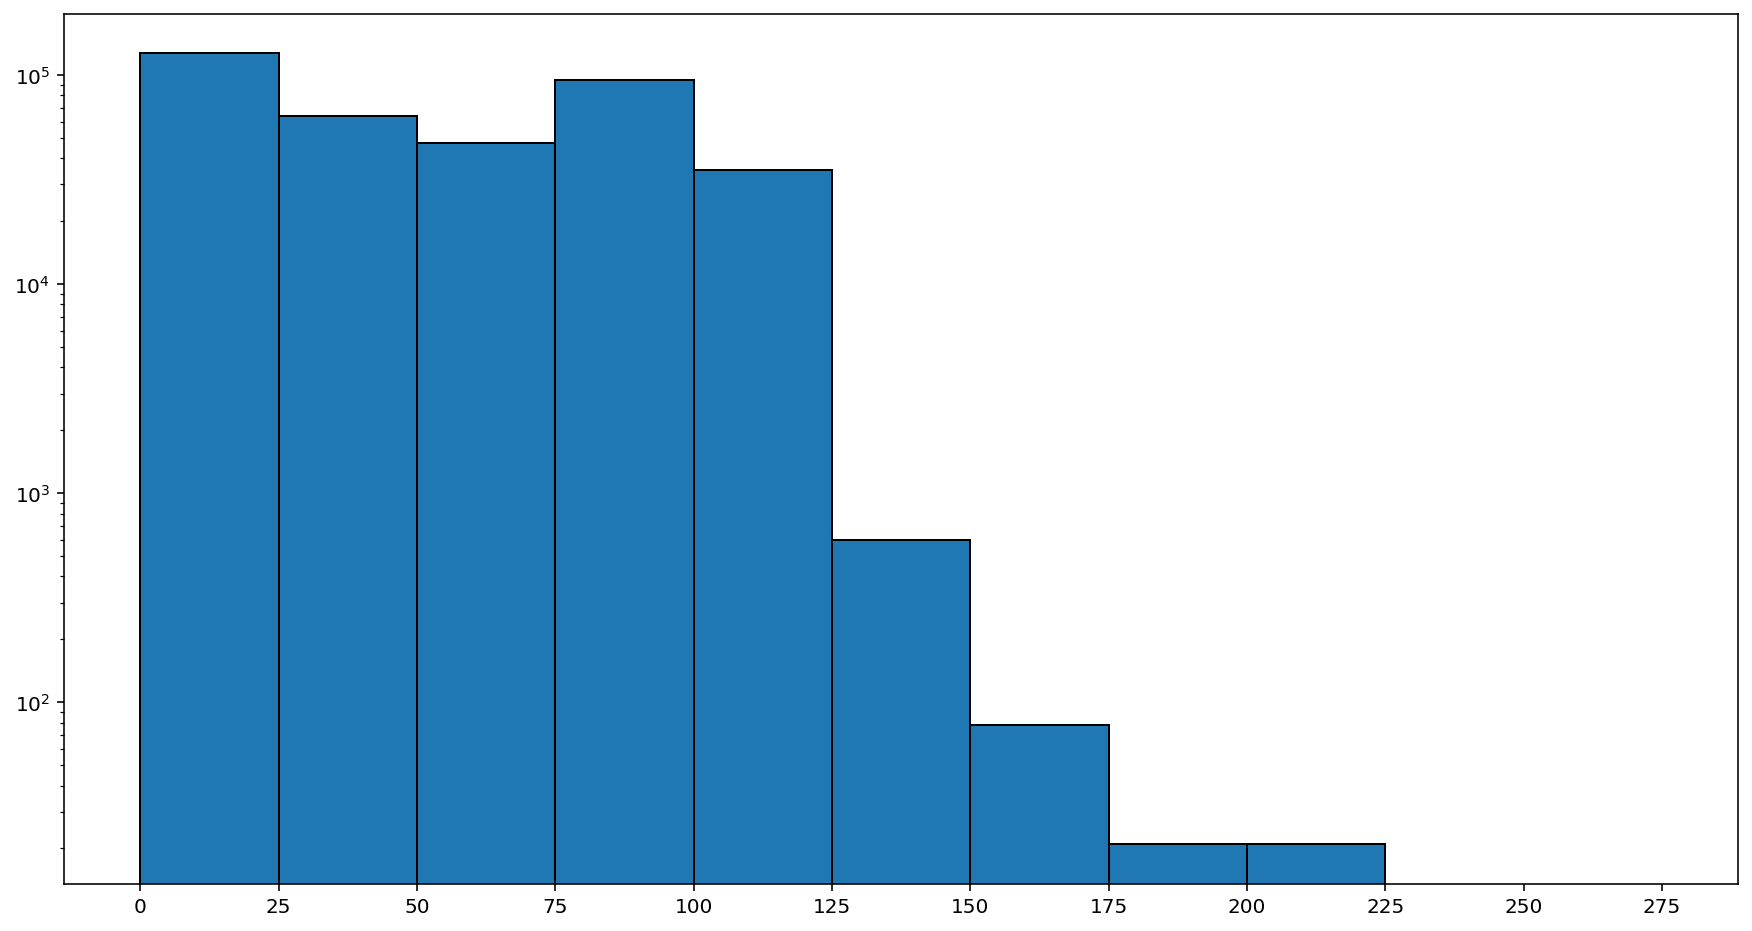

In [77]:
bins = range(0,300,25)
plt.figure(figsize=(15,8))
plt.hist(df_openfood["Sum_of_ingredients"].values, bins=bins, edgecolor="k", log = True)
plt.xticks(bins)

plt.show()

How many products exceed 100g of these nutrients combined ?

In [78]:
(df_openfood["Sum_of_ingredients"] > 100).sum()

28022

The sum of those nutrients should normally not exceed 100g. If we take a look at the summary statistics or the plot above, we can see that there are 28'022 products that exceed this limit. It might be due to errors when entering the data, due to conversion issues or imprecision when rounding the values.

In [79]:
df_openfood[["protein_per_hundred","fat_per_hundred","carbohydrates_per_hundred", "salt_per_hundred", "fiber_per_hundred",
             "ingredients_en","Sum_of_ingredients"]].loc[df_openfood["Sum_of_ingredients"] > 100].head(10)

,protein_per_hundred,fat_per_hundred,carbohydrates_per_hundred,salt_per_hundred,fiber_per_hundred,ingredients_en,Sum_of_ingredients
291,0.5,0.5,99.0,0.01,0.0,Honey and herbs candies,100.01
321,2.5,26.0,71.0,2.40,1.5,"CARBONATED WATER, NATURAL FLAVOR.",103.40
842,6.0,33.0,52.0,0.03,9.0,"CARBONATED WATER, NATURAL FLAVOR.",100.03
927,0.0,0.0,100.0,0.08,0.0,"CARBONATED WATER, NATURAL FLAVOR.",100.08
932,0.0,0.0,100.0,0.08,0.0,"CARBONATED WATER, NATURAL FLAVOR.",100.08
1022,8.0,19.0,69.0,2.80,5.0,"CARBONATED WATER, NATURAL FLAVOR.",103.80
1061,3.8,25.3,66.5,0.80,5.8,"CARBONATED WATER, NATURAL FLAVOR.",102.20
1098,5.0,29.0,65.0,0.50,1.5,"CARBONATED WATER, NATURAL FLAVOR.",101.00
1230,0.4,2.0,60.5,0.00,60.5,"CARBONATED WATER, NATURAL FLAVOR.",123.40
1236,0.4,0.5,68.0,0.03,67.0,"CARBONATED WATER, NATURAL FLAVOR.",135.93


#### **8.Despite removing recording errors from the ```per_hundred``` columns, some of them still contain “extreme” values, which are distinct from the rest of the data points. Your goal is to pick a few variables from the ```per_hundred``` list and address outliers.**

In [80]:
per100_columns_list

['calcium_per_hundred',
 'carbohydrates_per_hundred',
 'cholesterol_per_hundred',
 'copper_cu_per_hundred',
 'energy_kcal_per_hundred',
 'energy_per_hundred',
 'fat_per_hundred',
 'fatty_acids_total_saturated_per_hundred',
 'fatty_acids_total_trans_per_hundred',
 'fiber_insoluble_per_hundred',
 'fiber_per_hundred',
 'fiber_soluble_per_hundred',
 'folate_total_per_hundred',
 'folic_acid_per_hundred',
 'iron_per_hundred',
 'magnesium_per_hundred',
 'manganese_mn_per_hundred',
 'monounsaturated_fatty_acids_per_hundred',
 'phosphorus_per_hundred',
 'polyunsaturated_fatty_acids_per_hundred',
 'potassium_k_per_hundred',
 'protein_per_hundred',
 'salt_per_hundred',
 'saturated_fat_per_hundred',
 'sodium_per_hundred',
 'sugars_added_per_hundred',
 'sugars_per_hundred',
 'vitamin_a_iu_per_hundred',
 'vitamin_b12_cobalamin_per_hundred',
 'vitamin_b1_thiamin_per_hundred',
 'vitamin_b2_riboflavin_per_hundred',
 'vitamin_b3_niacin_per_hundred',
 'vitamin_b5_panthothenic_acid_per_hundred',
 'vitamin

In [81]:
df_openfood[['calcium_per_hundred',
 'carbohydrates_per_hundred',
 'cholesterol_per_hundred',
 'copper_cu_per_hundred',
 'energy_kcal_per_hundred',
 'energy_per_hundred',
 'fat_per_hundred',
 'fatty_acids_total_saturated_per_hundred',
 'fatty_acids_total_trans_per_hundred',
 'fiber_insoluble_per_hundred',
 'fiber_per_hundred',
 'fiber_soluble_per_hundred',
 'folate_total_per_hundred',
 'folic_acid_per_hundred',
 'iron_per_hundred',
 'magnesium_per_hundred',
 'manganese_mn_per_hundred',
 'monounsaturated_fatty_acids_per_hundred',
 'phosphorus_per_hundred',
 'polyunsaturated_fatty_acids_per_hundred',
 'potassium_k_per_hundred',
 'protein_per_hundred',
 'salt_per_hundred',
 'saturated_fat_per_hundred',
 'sodium_per_hundred',
 'sugars_added_per_hundred',
 'sugars_per_hundred',
 'vitamin_a_iu_per_hundred',
 'vitamin_b12_cobalamin_per_hundred',
 'vitamin_b1_thiamin_per_hundred',
 'vitamin_b2_riboflavin_per_hundred',
 'vitamin_b3_niacin_per_hundred',
 'vitamin_b5_panthothenic_acid_per_hundred',
 'vitamin_b6_pyridoxin_per_hundred',
 'vitamin_c_ascorbic_acid_per_hundred',
 'vitamin_d_d2_d3_international_units_per_hundred',
 'zinc_per_hundred']].describe().T

,count,mean,std,min,25%,50%,75%,max
calcium_per_hundred,369464.0,69.649210,442.413708,0.0,0.00,0.00,71.00,93750.00
carbohydrates_per_hundred,369464.0,31.259487,29.386487,0.0,5.00,20.00,57.14,100.00
cholesterol_per_hundred,369464.0,30.775067,994.424351,0.0,0.00,0.00,11.00,100000.00
copper_cu_per_hundred,369464.0,1.111257,27.116882,0.0,1.07,1.07,1.07,16483.52
energy_kcal_per_hundred,369464.0,236.469369,187.796170,0.0,53.00,231.00,389.00,772.00
energy_per_hundred,369464.0,989.281289,785.550651,0.0,221.75,962.32,1627.58,3230.05
fat_per_hundred,369464.0,10.745304,14.354032,0.0,0.00,3.57,17.86,100.00
fatty_acids_total_saturated_per_hundred,369464.0,3.479473,6.032086,0.0,0.00,0.00,5.00,96.97
fatty_acids_total_trans_per_hundred,369464.0,0.022819,0.402948,0.0,0.00,0.00,0.00,53.57
fiber_insoluble_per_hundred,369464.0,0.040340,0.624587,0.0,0.00,0.00,0.00,43.00


We pick some of these variables. There are some odd paterns. Sometimes, we have variables that have a max value that is far from their mean or median.

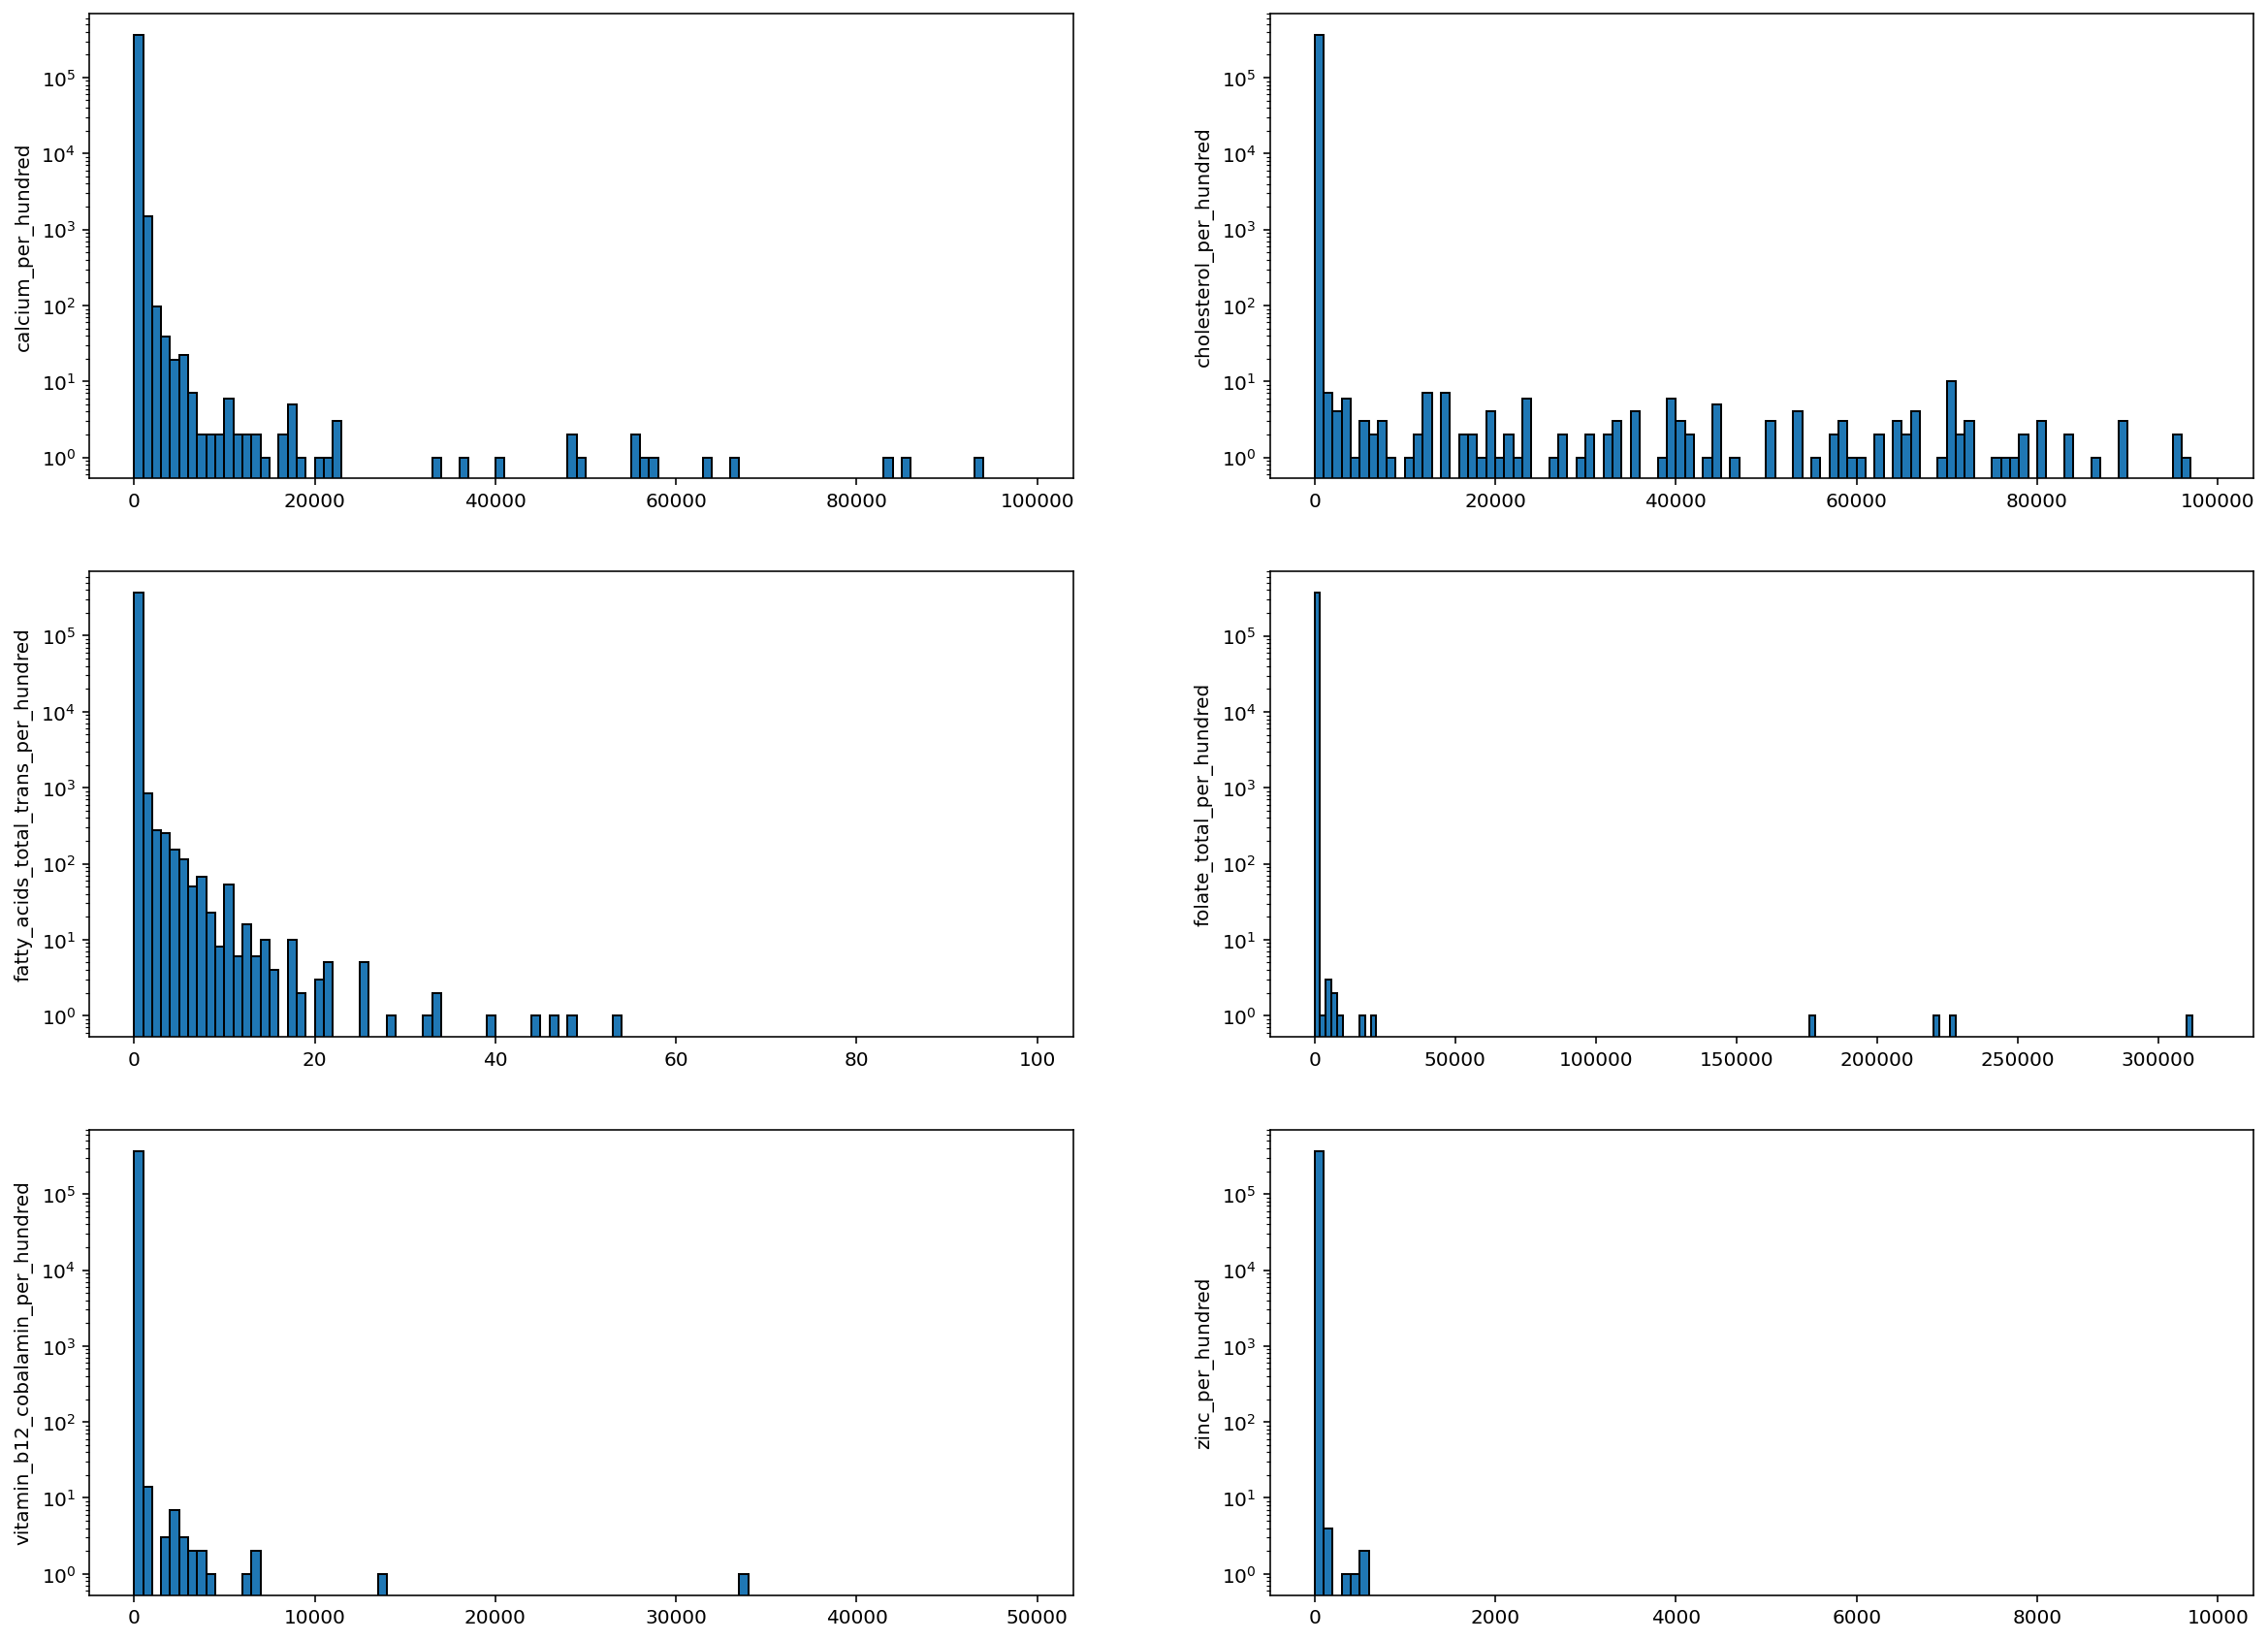

In [82]:
plt.figure(figsize = [20,15])

#1

plt.subplot(3,2,1)
plt.hist(df_openfood["calcium_per_hundred"].values, bins=range(0,100000,1000), edgecolor="k", log = True)
plt.ylabel('calcium_per_hundred')


#2

plt.subplot(3,2,2)
plt.hist(df_openfood["cholesterol_per_hundred"].values, bins=range(0,100000,1000), edgecolor="k", log = True)
plt.ylabel('cholesterol_per_hundred')

#3

plt.subplot(3,2,3)
plt.hist(df_openfood["fatty_acids_total_trans_per_hundred"].values, bins=range(0,100,1), edgecolor="k", log = True)
plt.ylabel('fatty_acids_total_trans_per_hundred')

#4

plt.subplot(3,2,4)
plt.hist(df_openfood["folate_total_per_hundred"].values, bins=range(0,320000, 2000), edgecolor="k", log = True)
plt.ylabel('folate_total_per_hundred')

#5

plt.subplot(3,2,5)
plt.hist(df_openfood["vitamin_b12_cobalamin_per_hundred"].values, bins=range(0,50000,500), edgecolor="k", log = True)
plt.ylabel('vitamin_b12_cobalamin_per_hundred')

#6

plt.subplot(3,2,6)
plt.hist(df_openfood["zinc_per_hundred"].values, bins=range(0,10000, 100), edgecolor="k", log = True)
plt.ylabel('zinc_per_hundred');

In [83]:
df_openfood_ex8 = df_openfood.loc[:,["calcium_per_hundred", "cholesterol_per_hundred", "fatty_acids_total_trans_per_hundred",
                                  "folate_total_per_hundred","vitamin_b12_cobalamin_per_hundred", "zinc_per_hundred"]]

- We are going to remove outliers using the **IQR method** :

In [84]:
# Removal of calcium outliers
Q1 = df_openfood_ex8["calcium_per_hundred"].quantile(0.25)
Q3 = df_openfood_ex8["calcium_per_hundred"].quantile(0.75)
IQR = Q3 - Q1
filtered_ex8 = df_openfood_ex8.query(
    '(@Q1 - 1.5 * @IQR) <= calcium_per_hundred <= (@Q3 + 1.5 * @IQR)')

In [85]:
# Removal of cholesterol outliers
Q1_chol = df_openfood_ex8["cholesterol_per_hundred"].quantile(0.25)
Q3_chol = df_openfood_ex8["cholesterol_per_hundred"].quantile(0.75)
IQR_chol = Q3_chol - Q1_chol
filtered_ex8 = filtered_ex8.query(
    '(@Q1_chol - 1.5 * @IQR_chol) <= cholesterol_per_hundred <= (@Q3_chol + 1.5 * @IQR_chol)')

In [86]:
# Removal of fatty acid outliers
Q1_fatty = df_openfood_ex8["fatty_acids_total_trans_per_hundred"].quantile(0.25)
Q3_fatty = df_openfood_ex8["fatty_acids_total_trans_per_hundred"].quantile(0.75)
IQR_fatty = Q3_fatty - Q1_fatty
filtered_ex8 = filtered_ex8.query(
    '(@Q1_fatty - 1.5 * @IQR_fatty) <= fatty_acids_total_trans_per_hundred <= (@Q3_fatty + 1.5 * @IQR_fatty)')


In [87]:
# Removal of folate outliers
Q1_folate = df_openfood_ex8["folate_total_per_hundred"].quantile(0.25)
Q3_folate = df_openfood_ex8["folate_total_per_hundred"].quantile(0.75)
IQR_folate = Q3_folate - Q1_folate
filtered_ex8 = filtered_ex8.query(
    '(@Q1_folate - 1.5 * @IQR_folate) <= folate_total_per_hundred <= (@Q3_folate + 1.5 * @IQR_folate)')

In [88]:
# Removal of vitamin b12 outliers
Q1_vitab12 = df_openfood_ex8["vitamin_b12_cobalamin_per_hundred"].quantile(0.25)
Q3_vitab12  = df_openfood_ex8["vitamin_b12_cobalamin_per_hundred"].quantile(0.75)
IQR_vitab12  = Q3_vitab12  - Q1_vitab12 
filtered_ex8 = filtered_ex8.query(
    '(@Q1_vitab12  - 1.5 * @IQR_vitab12 ) <= vitamin_b12_cobalamin_per_hundred <= (@Q3_vitab12  + 1.5 * @IQR_vitab12 )')


In [89]:
# Removal of zinc outliers
Q1_zinc = df_openfood_ex8["zinc_per_hundred"].quantile(0.25)
Q3_zinc = df_openfood_ex8["zinc_per_hundred"].quantile(0.75)
IQR_zinc = Q3_zinc - Q1_zinc
filtered_ex8 = filtered_ex8.query(
    '(@Q1_zinc - 1.5 * @IQR_zinc) <= zinc_per_hundred <= (@Q3_zinc + 1.5 * @IQR_zinc)')

In [90]:
filtered_ex8.describe().T

,count,mean,std,min,25%,50%,75%,max
calcium_per_hundred,275697.0,26.512375,42.977050,0.0,0.0,0.0,41.0,177.0
cholesterol_per_hundred,275697.0,1.963322,5.380685,0.0,0.0,0.0,0.0,27.0
fatty_acids_total_trans_per_hundred,275697.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
folate_total_per_hundred,275697.0,214.000000,0.000000,214.0,214.0,214.0,214.0,214.0
vitamin_b12_cobalamin_per_hundred,275697.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
zinc_per_hundred,275697.0,0.500000,0.000000,0.5,0.5,0.5,0.5,0.5


Our filters worked, but it is maybe not a good solution. As we replaced NaN values by their median, here, we end up with IQRs equal to 0 :

In [91]:
print(IQR)
print(IQR_chol)
print(IQR_fatty)
print(IQR_folate)
print(IQR_vitab12)
print(IQR_zinc)

71.0
11.0
0.0
0.0
0.0
0.0


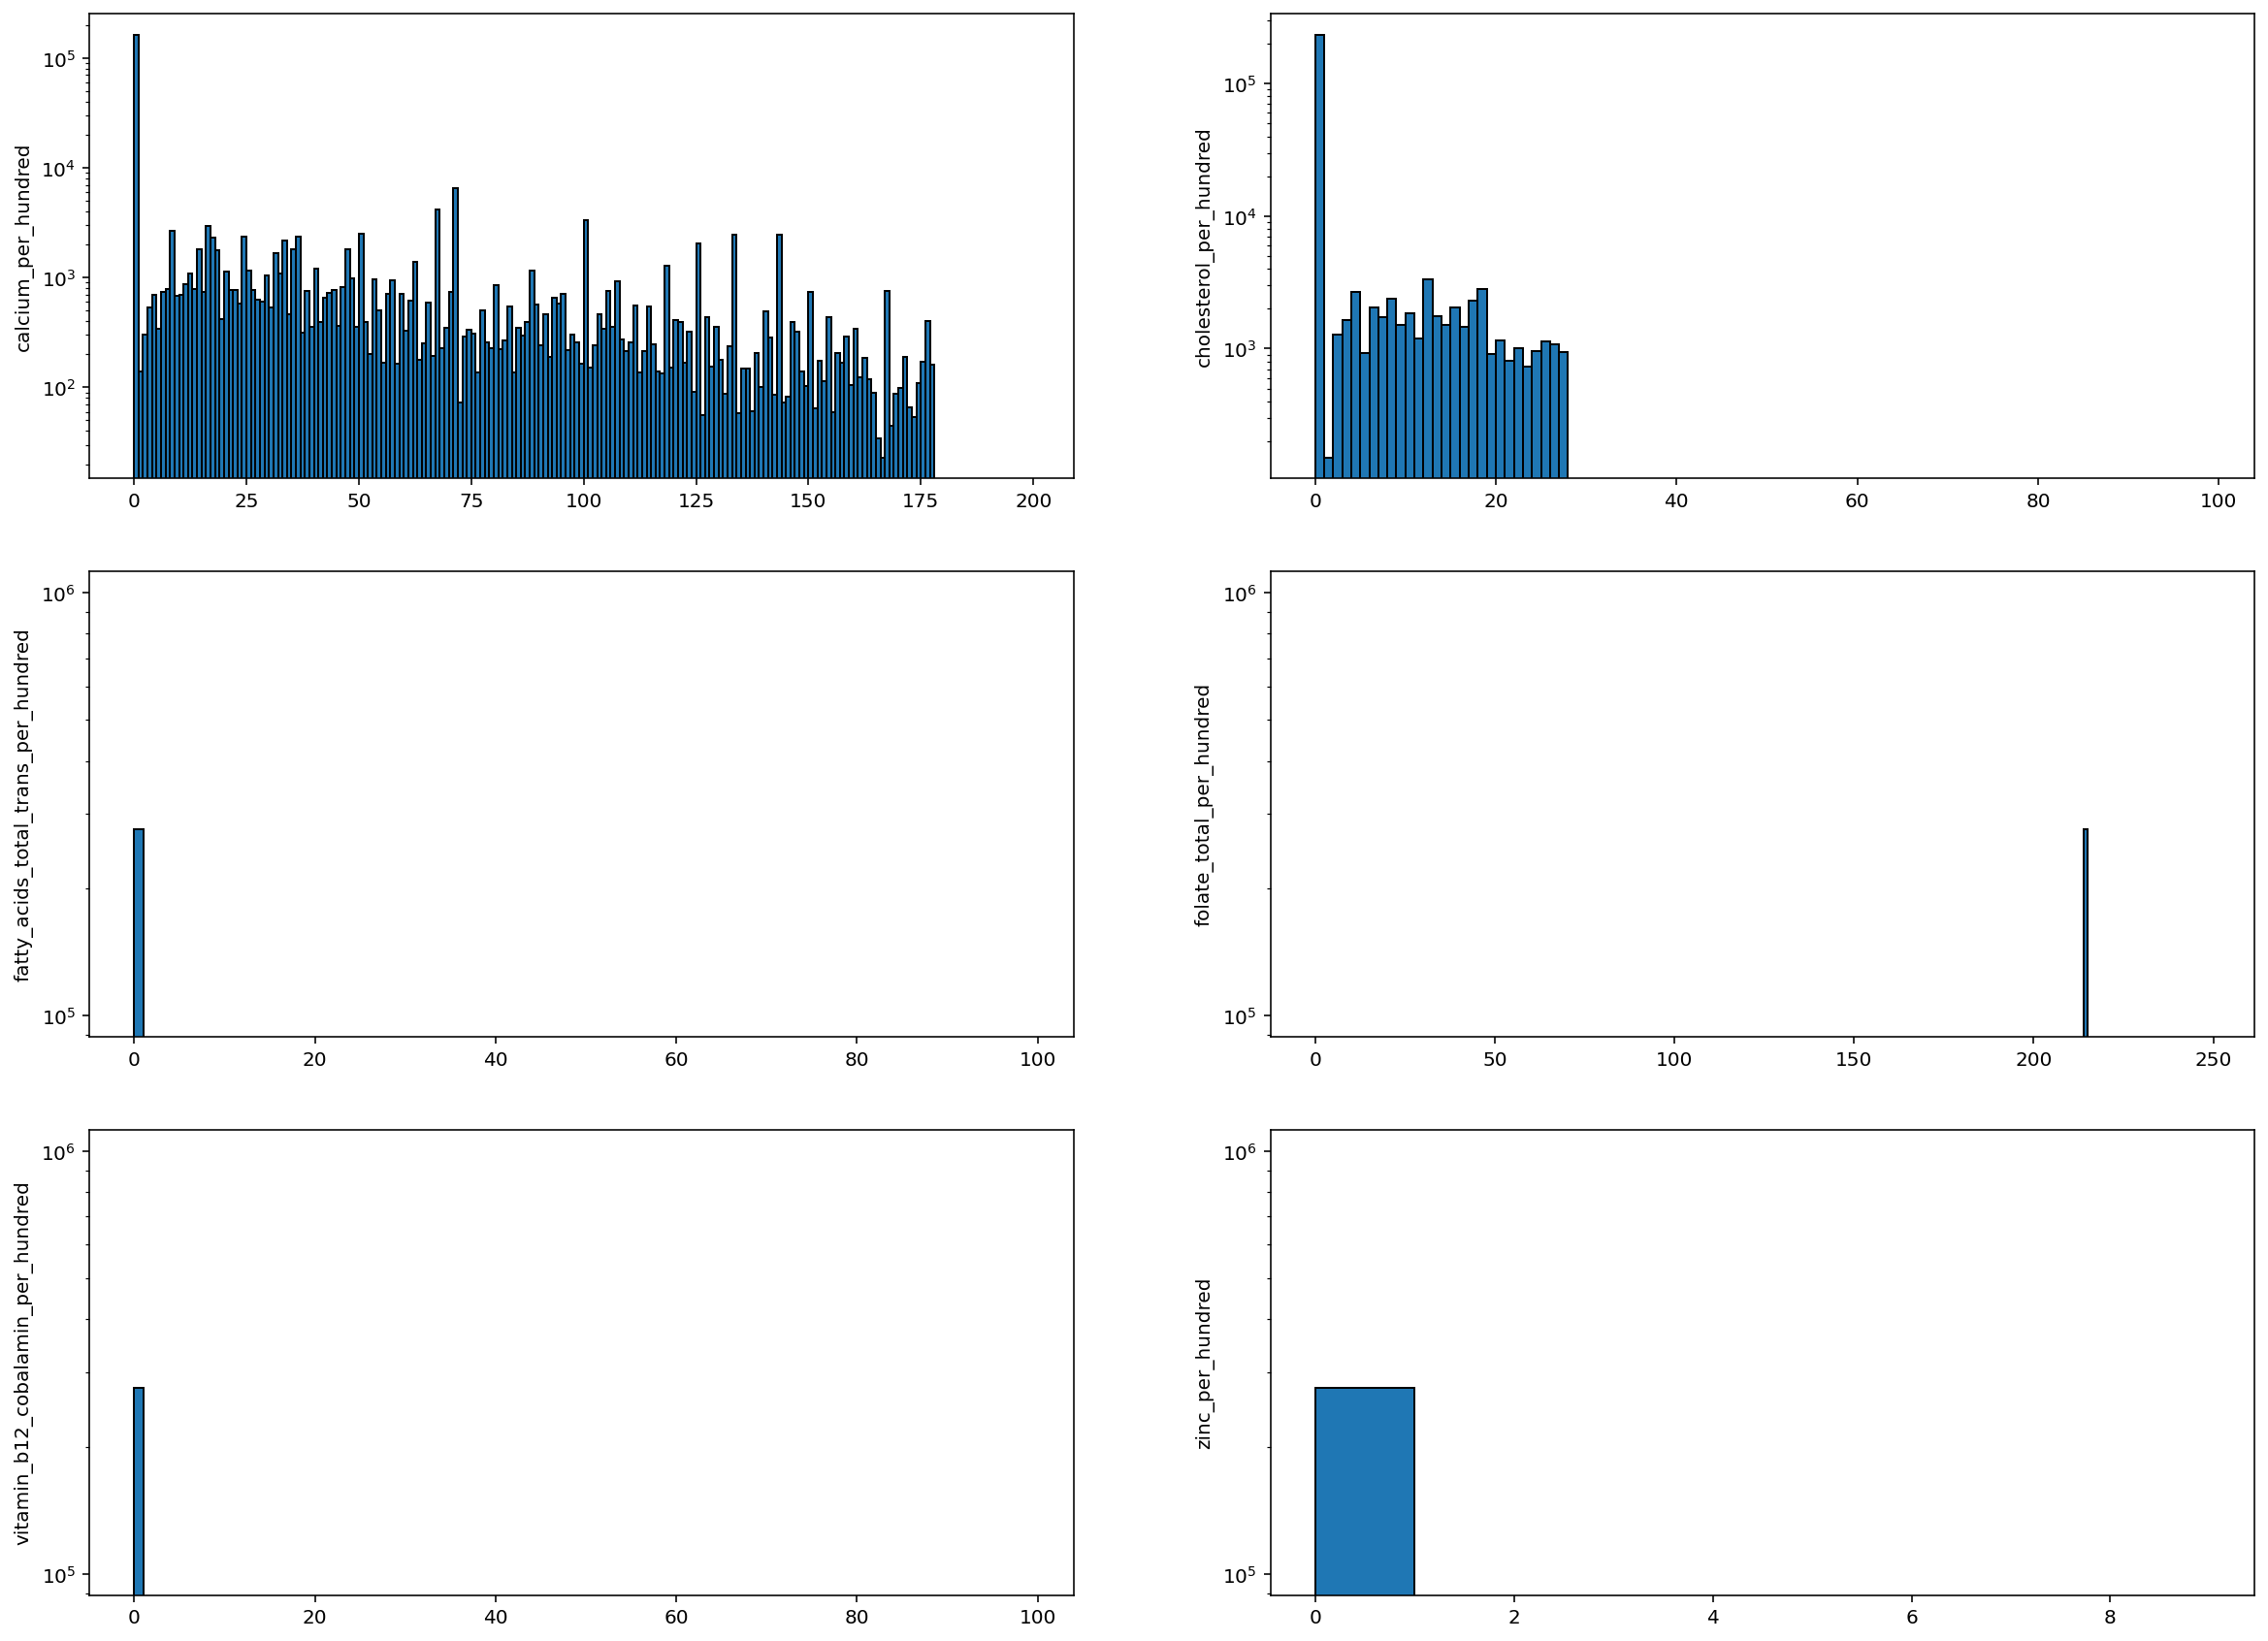

In [92]:
plt.figure(figsize = [20,15])

#1

plt.subplot(3,2,1)
plt.hist(filtered_ex8["calcium_per_hundred"].values, bins=range(0,200,1), edgecolor="k", log = True)
plt.ylabel('calcium_per_hundred')


#2

plt.subplot(3,2,2)
plt.hist(filtered_ex8["cholesterol_per_hundred"].values, bins=range(0,100,1), edgecolor="k", log = True)
plt.ylabel('cholesterol_per_hundred')

#3

plt.subplot(3,2,3)
plt.hist(filtered_ex8["fatty_acids_total_trans_per_hundred"].values, bins=range(0,100,1), edgecolor="k", log = True)
plt.ylabel('fatty_acids_total_trans_per_hundred')

#4

plt.subplot(3,2,4)
plt.hist(filtered_ex8["folate_total_per_hundred"].values, bins=range(0,250, 1), edgecolor="k", log = True)
plt.ylabel('folate_total_per_hundred')

#5

plt.subplot(3,2,5)
plt.hist(filtered_ex8["vitamin_b12_cobalamin_per_hundred"].values, bins=range(0,100,1), edgecolor="k", log = True)
plt.ylabel('vitamin_b12_cobalamin_per_hundred')

#6

plt.subplot(3,2,6)
plt.hist(filtered_ex8["zinc_per_hundred"].values, bins=range(0,10, 1), edgecolor="k", log = True)
plt.ylabel('zinc_per_hundred');

Using the IQR method to remove outliers seem a bit too harsh. This method has work for our two first features ```calcium_per_hundred``` and ```cholesterol_per_hundred```. It might be better to remove high values just by looking at the plots, obtained in cell [82]. We can see some values that are far from the majority of our observations. 

So we are going to remove extreme values manually, by visual inspection (see plots cell [82]).

In [93]:
df_openfood.shape

(369464, 100)

- Removal of ```fatty_acids_total_trans_per_hundred``` outliers :

In [94]:
df_openfood = df_openfood[df_openfood["fatty_acids_total_trans_per_hundred"] < 30]

- Removal of ```folate_total_per_hundred``` outliers :

In [95]:
df_openfood = df_openfood[df_openfood["folate_total_per_hundred"] < 50000]

- Removal of ```vitamin_b12_cobalamin_per_hundred``` outliers :

In [96]:
df_openfood = df_openfood[df_openfood["vitamin_b12_cobalamin_per_hundred"] < 10000]

- Removal of ```zinc_per_hundred``` outliers :

In [97]:
df_openfood = df_openfood[df_openfood["zinc_per_hundred"] < 2000]

Let's redo the plots to visualize what we have done :

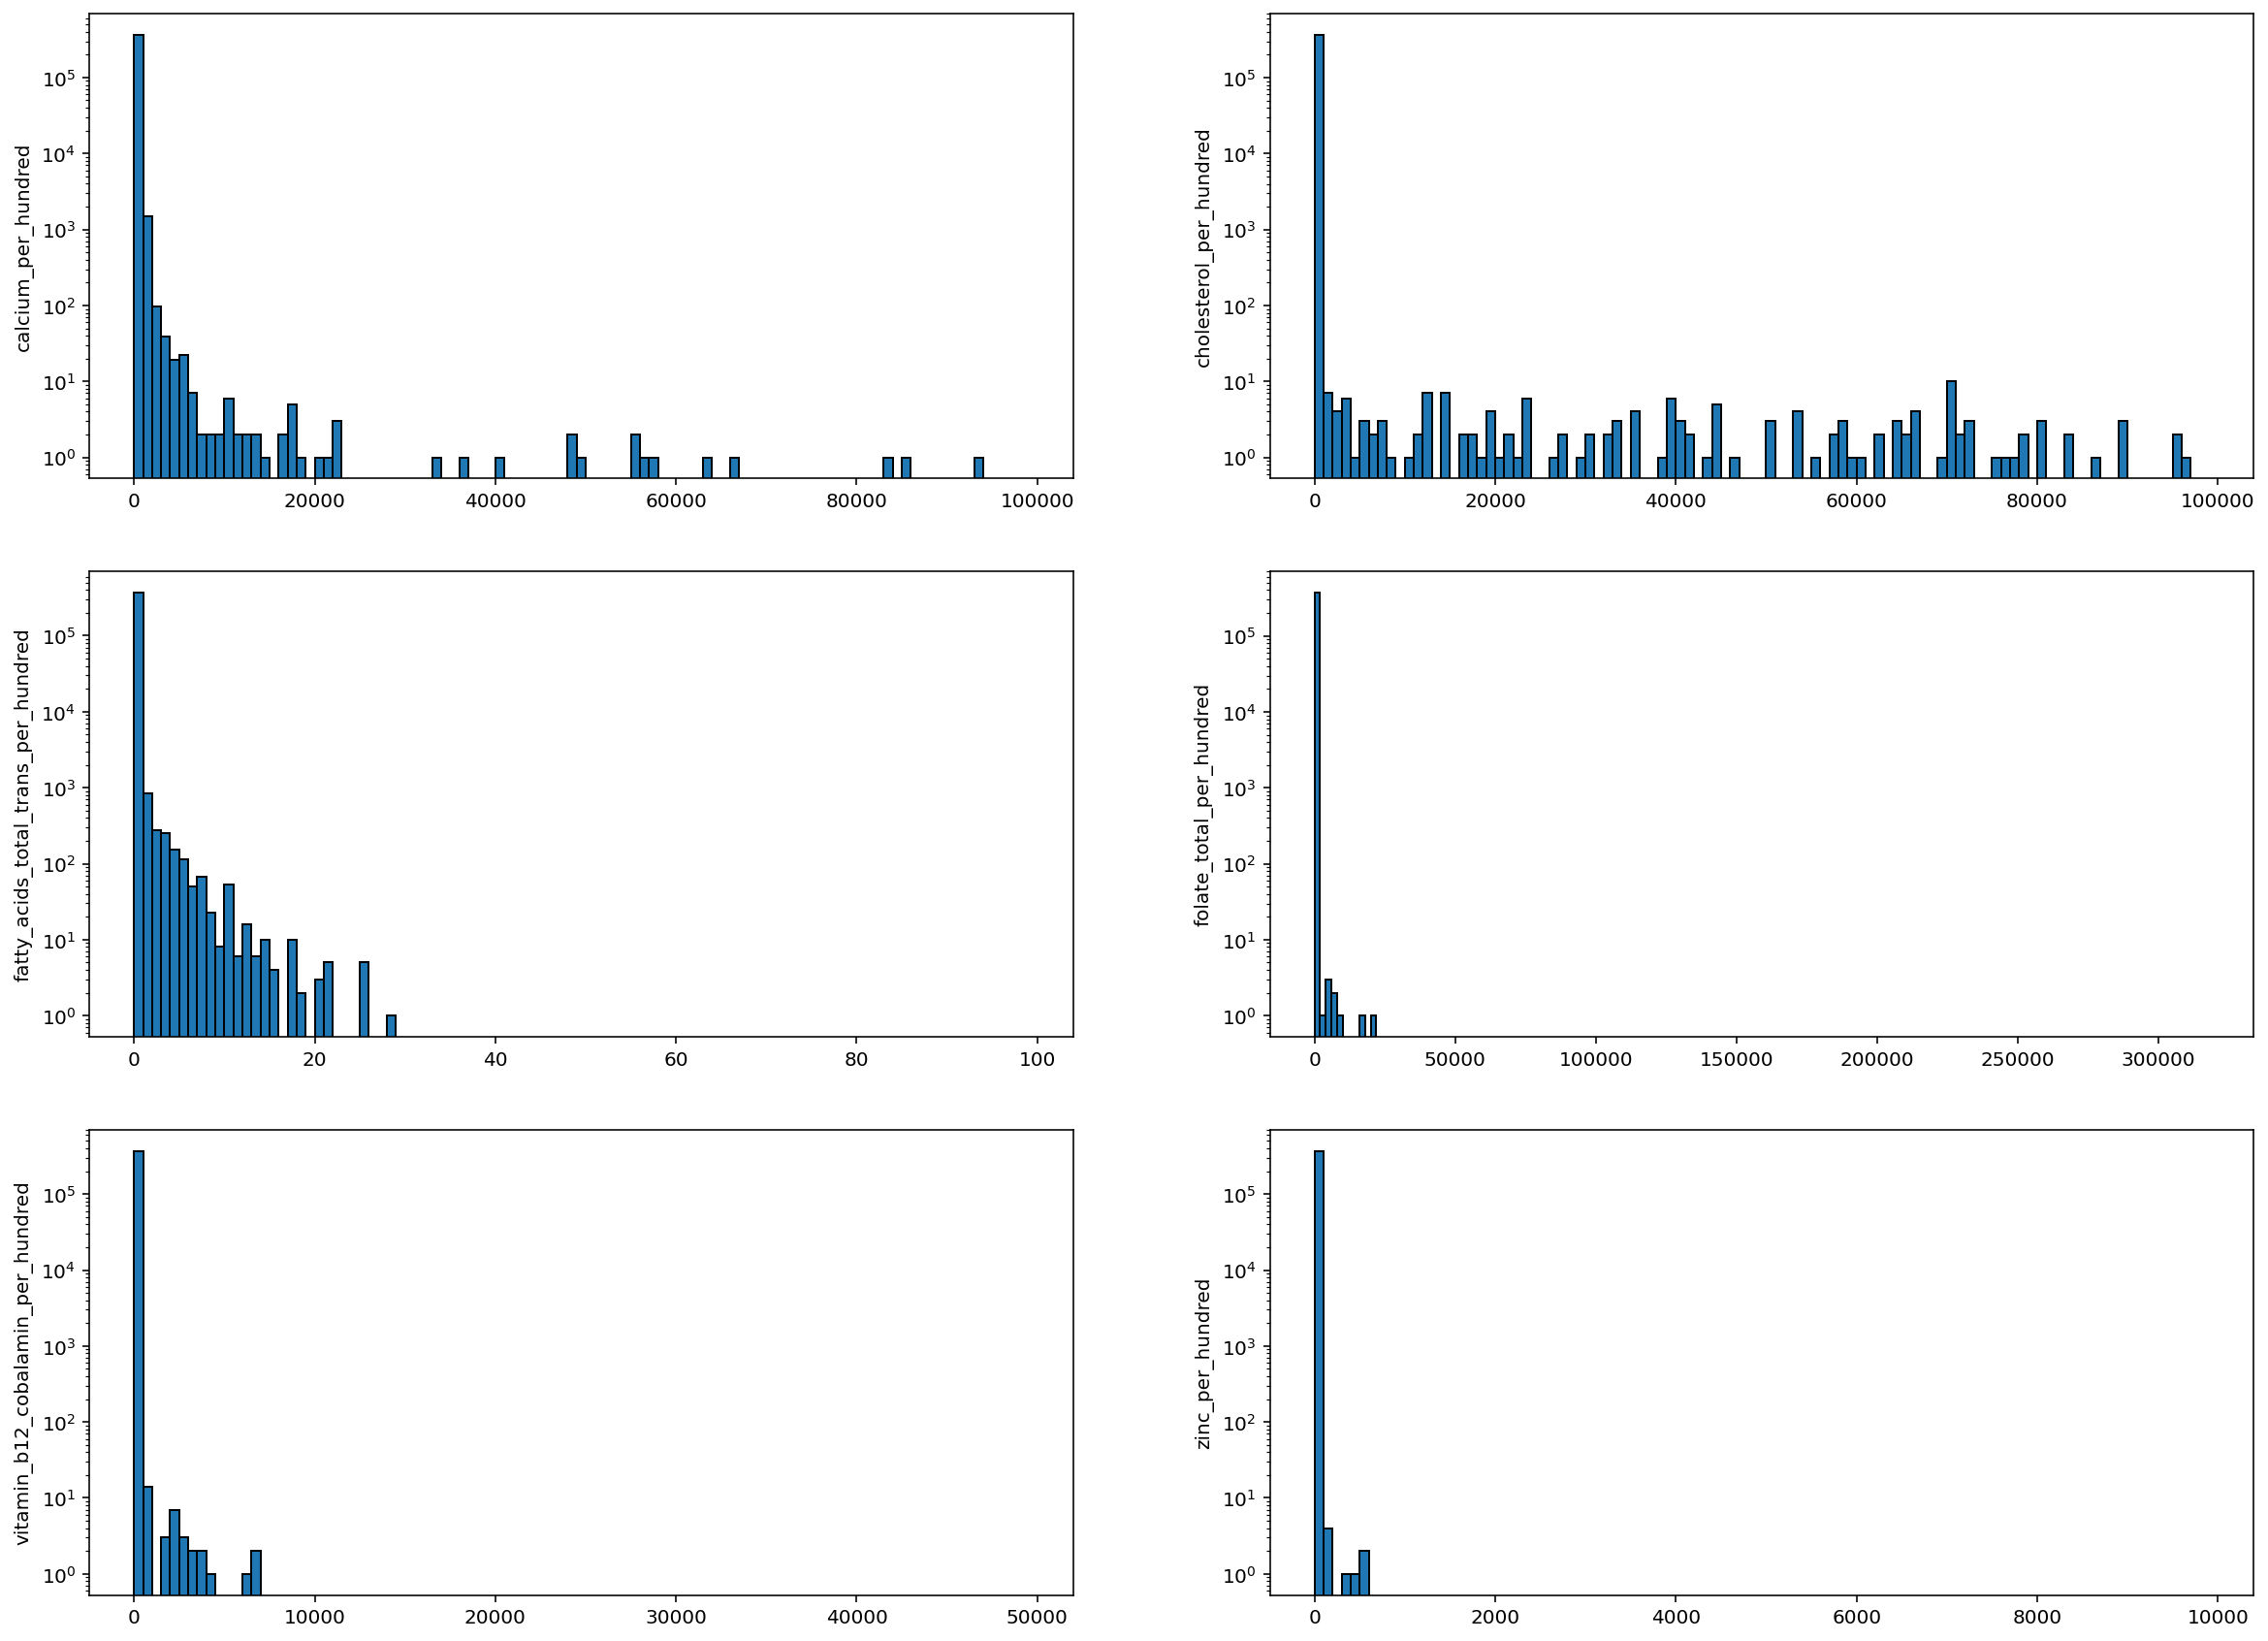

In [98]:
plt.figure(figsize = [20,15])

#1

plt.subplot(3,2,1)
plt.hist(df_openfood["calcium_per_hundred"].values, bins=range(0,100000,1000), edgecolor="k", log = True)
plt.ylabel('calcium_per_hundred')


#2

plt.subplot(3,2,2)
plt.hist(df_openfood["cholesterol_per_hundred"].values, bins=range(0,100000,1000), edgecolor="k", log = True)
plt.ylabel('cholesterol_per_hundred')

#3

plt.subplot(3,2,3)
plt.hist(df_openfood["fatty_acids_total_trans_per_hundred"].values, bins=range(0,100,1), edgecolor="k", log = True)
plt.ylabel('fatty_acids_total_trans_per_hundred')

#4

plt.subplot(3,2,4)
plt.hist(df_openfood["folate_total_per_hundred"].values, bins=range(0,320000, 2000), edgecolor="k", log = True)
plt.ylabel('folate_total_per_hundred')

#5

plt.subplot(3,2,5)
plt.hist(df_openfood["vitamin_b12_cobalamin_per_hundred"].values, bins=range(0,50000,500), edgecolor="k", log = True)
plt.ylabel('vitamin_b12_cobalamin_per_hundred')

#6

plt.subplot(3,2,6)
plt.hist(df_openfood["zinc_per_hundred"].values, bins=range(0,10000, 100), edgecolor="k", log = True)
plt.ylabel('zinc_per_hundred');

We managed to remove the observations that were (visually) really far from the majority. We might need more knowledge about these nutrients to define what is our limit value for each of these features.